In [1]:
import numpy as np
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from typing import List, Optional, Tuple

import corner


In [13]:
from starccato_flow.data.ccsn_snr_data import CCSNSNRData
from starccato_flow.training.trainer import Trainer

from starccato_flow.utils.defaults import TEN_KPC
from starccato_flow.plotting.plotting import plot_reconstruction_distribution, plot_candidate_signal

In [3]:
from starccato_flow.utils.defaults import DEVICE

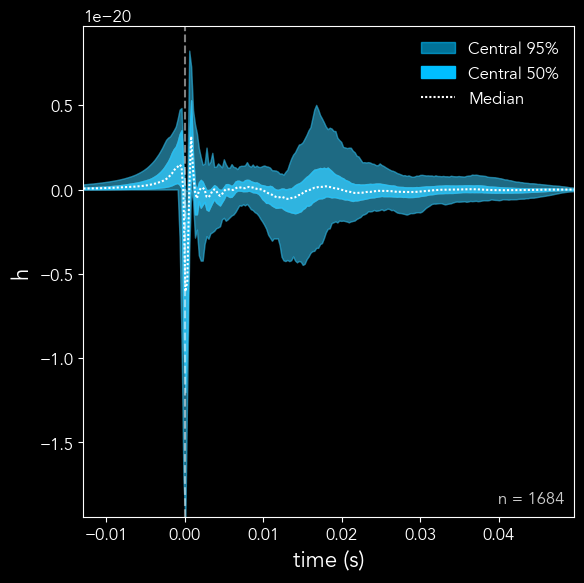

In [4]:
ccsn_dataset = CCSNSNRData(noise=True, curriculum=False)
ccsn_dataset.plot_signal_distribution(background="black", font_family="sans-serif", font_name="Avenir", fname="plots/ccsn_signal_distribution.svg")

In [5]:
# ccsn_dataset.plot_signal_grid(background="black", font_family="sans-serif", font_name="Avenir", fname="plots/ccsn_signal_grid.png")


=== Data Split (on base signals) ===
Total base signals: 1684
Training base signals: 1516
Validation base signals: 168
First 5 training indices: [ 360  336   81  684 1374]
First 5 validation indices: [722 519 222  32 111]
✓ Verification PASSED: No overlap between train and validation sets
  Train signals: 1516 unique indices
  Val signals: 168 unique indices
  Total coverage: 1684 / 1684

Verifying data alignment:
Number of signals: 1516
Number of parameter sets: 1516
Parameter columns: ['beta1_IC_b', 'omega_0(rad|s)', 'A(km)', 'Ye_c_b']
First few parameter values:
      beta1_IC_b  omega_0(rad|s)  A(km)   Ye_c_b
369     0.144352             8.5    467  0.26472
345     0.121586            10.0    300  0.26472
84      0.172129            12.5    300  0.27792
708     0.001442             1.0    300  0.28282
1447    0.047885             4.0    634  0.28170

Verifying data alignment:
Number of signals: 168
Number of parameter sets: 168
Parameter columns: ['beta1_IC_b', 'omega_0(rad|s)', '

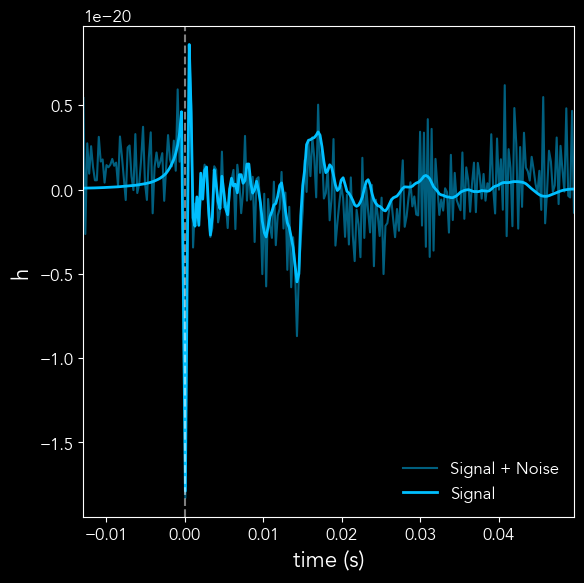

In [6]:
trainer = Trainer(
    toy=False, 
    start_snr=200,
    end_snr=10,
    noise=True, 
    validation_split=0.1,
    curriculum=True,
    noise_realizations=1
)

trainer.plot_candidate_signal(
    snr=30,
    index=60,
    background="black",
    fname="plots/ccsn_candidate_signal.png"
)

Epochs:   6%|▌         | 15/256 [00:37<09:48,  2.44s/it]

Generated signals shape: (32, 256)


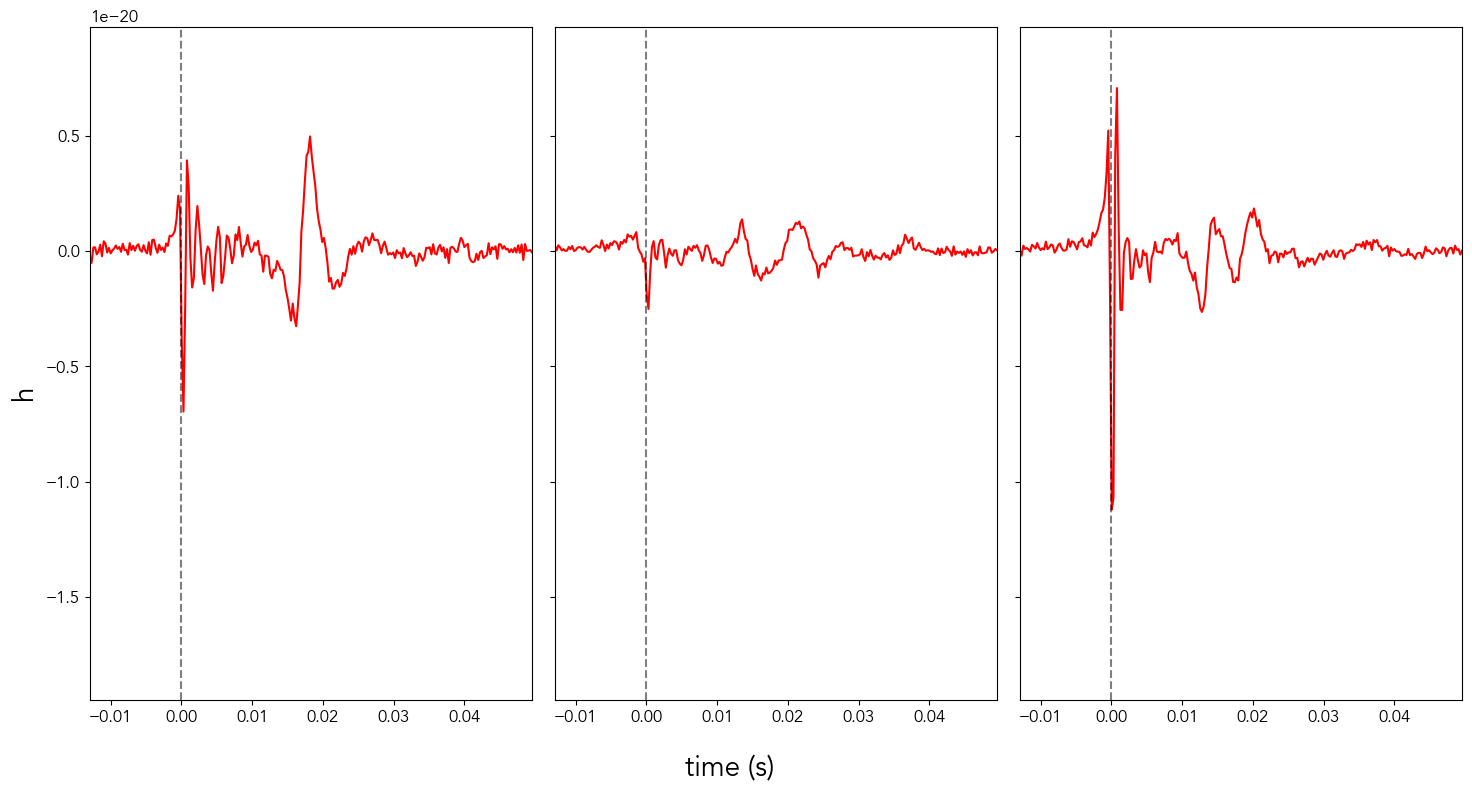

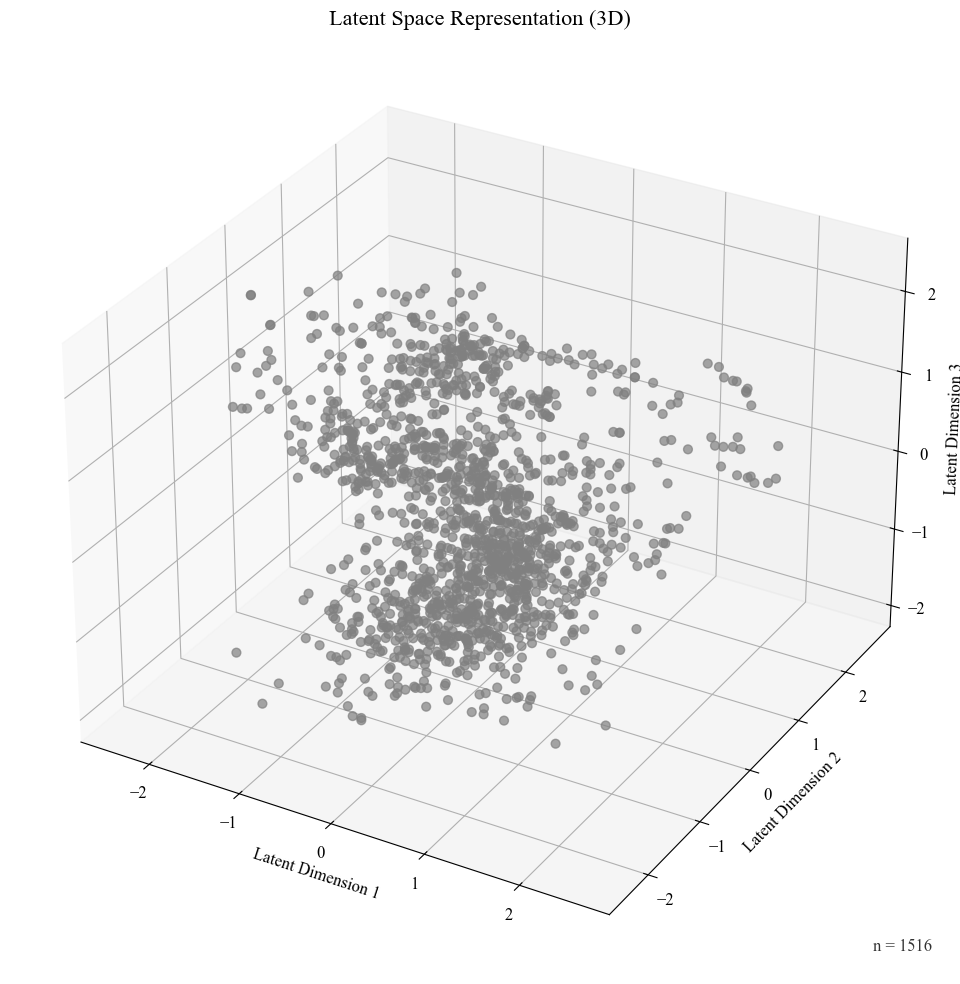

Epochs:  12%|█▏        | 31/256 [01:17<08:53,  2.37s/it]

Generated signals shape: (32, 256)


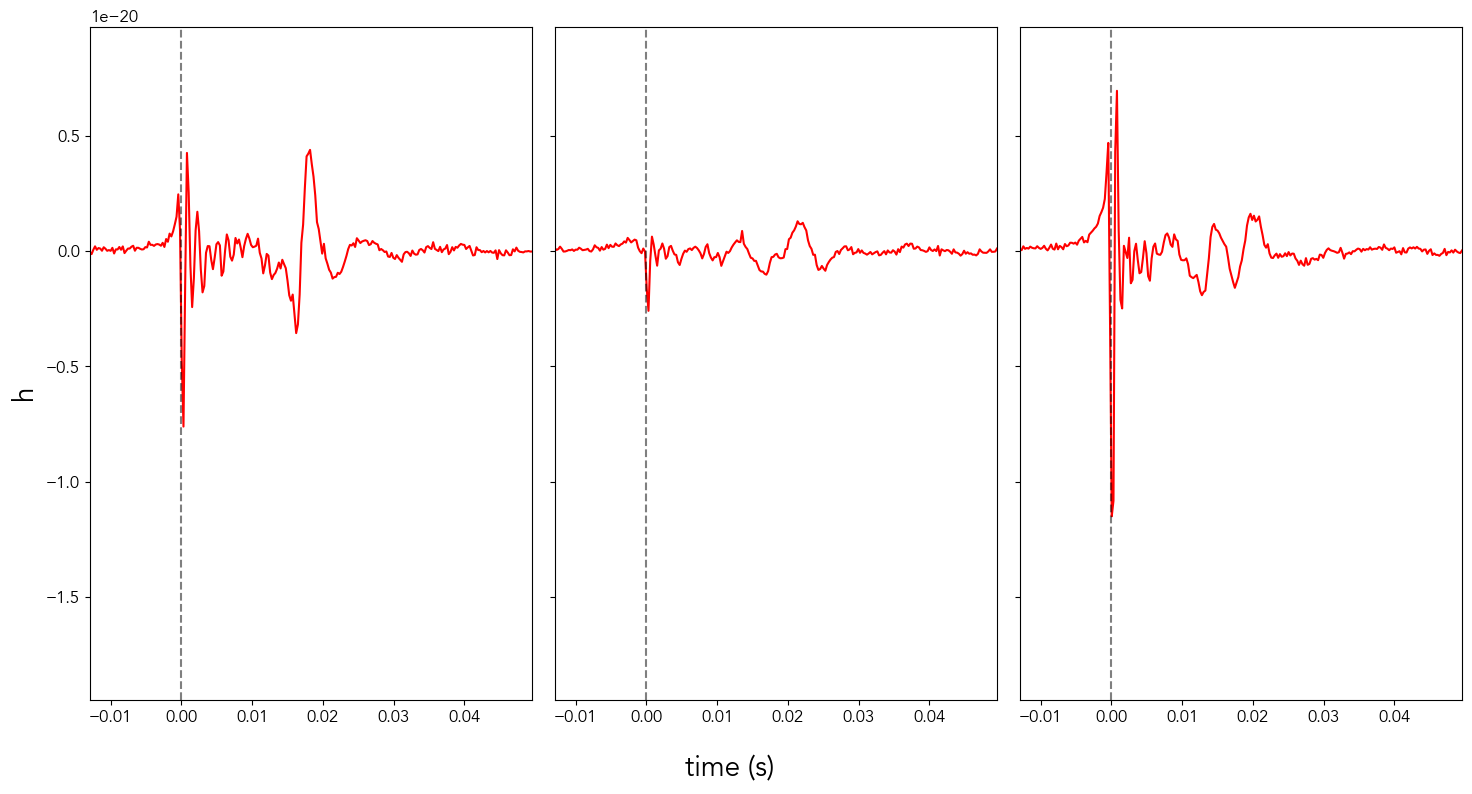

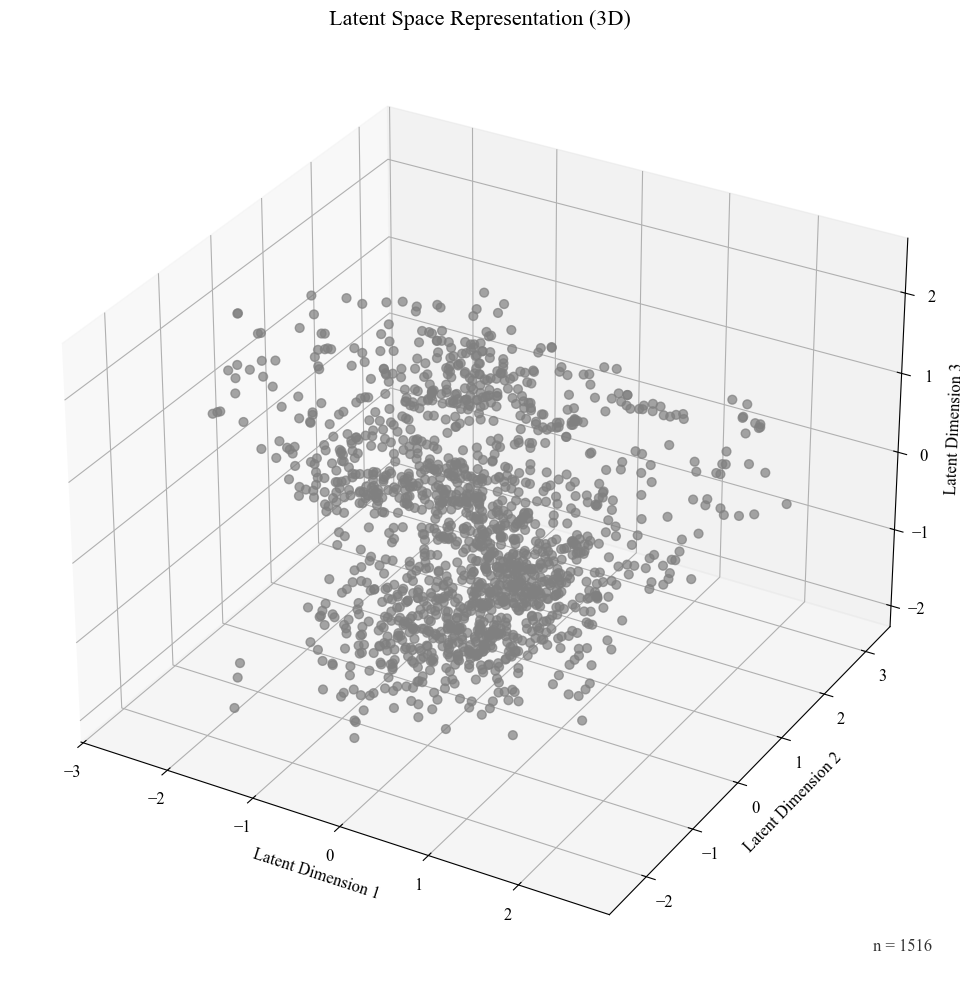

Epochs:  18%|█▊        | 47/256 [01:58<08:34,  2.46s/it]

Generated signals shape: (32, 256)


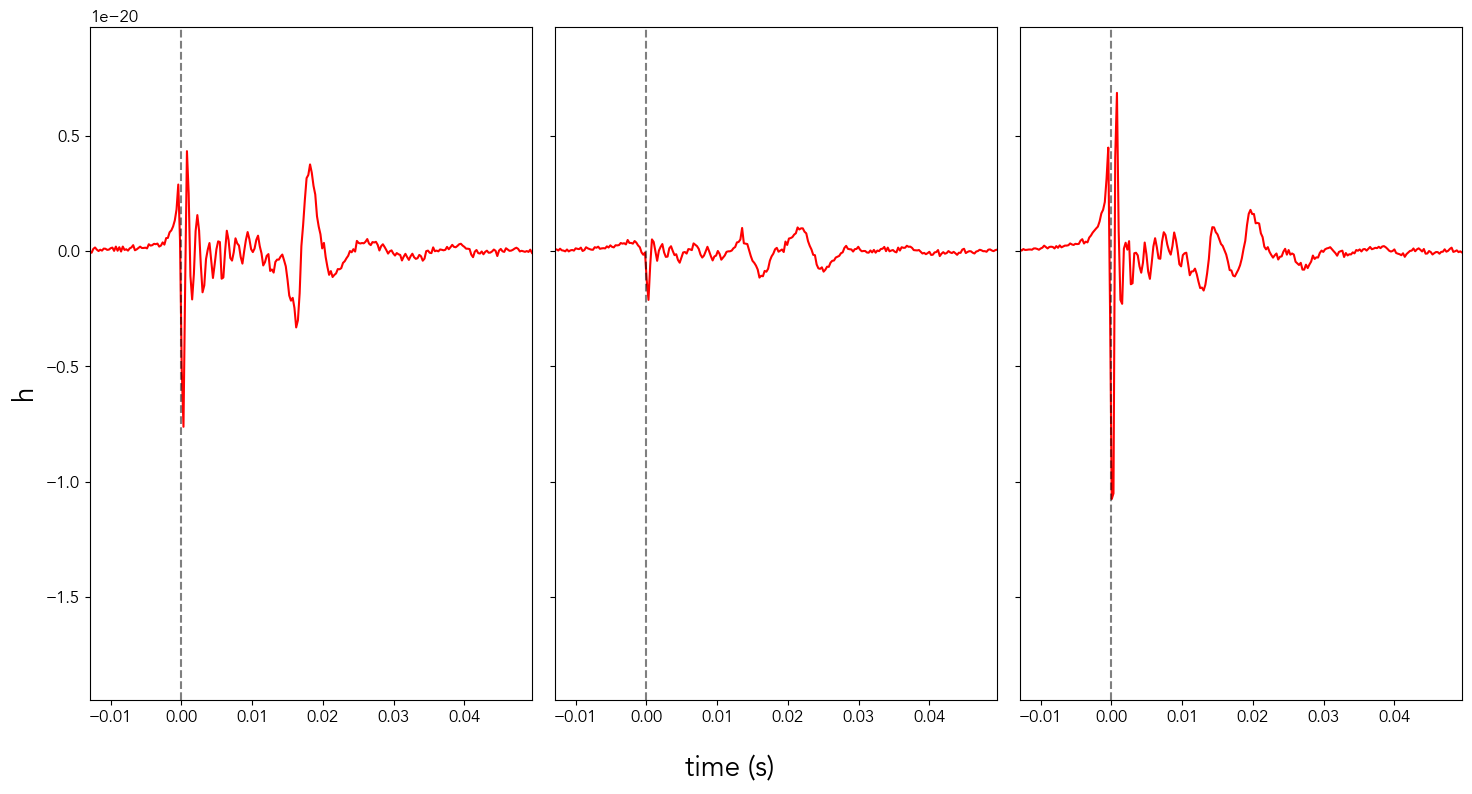

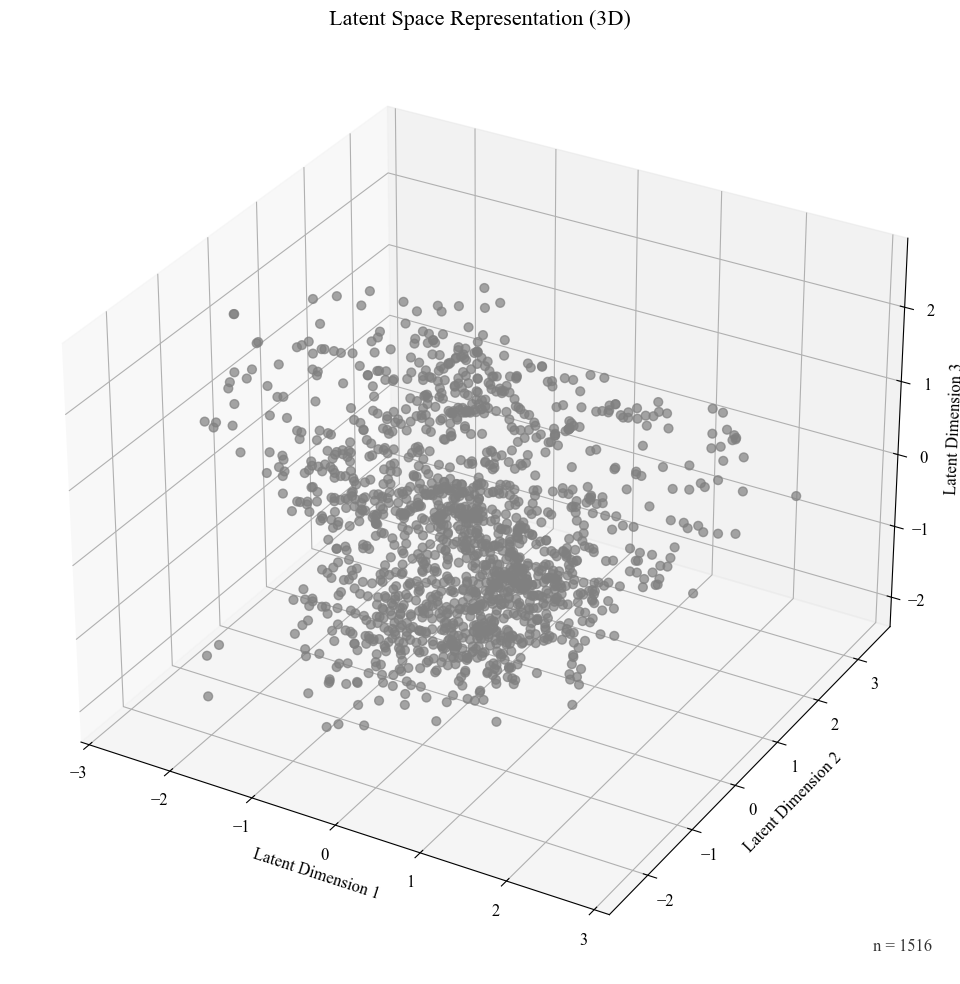

Epochs:  25%|██▍       | 63/256 [02:39<07:59,  2.49s/it]

Generated signals shape: (32, 256)


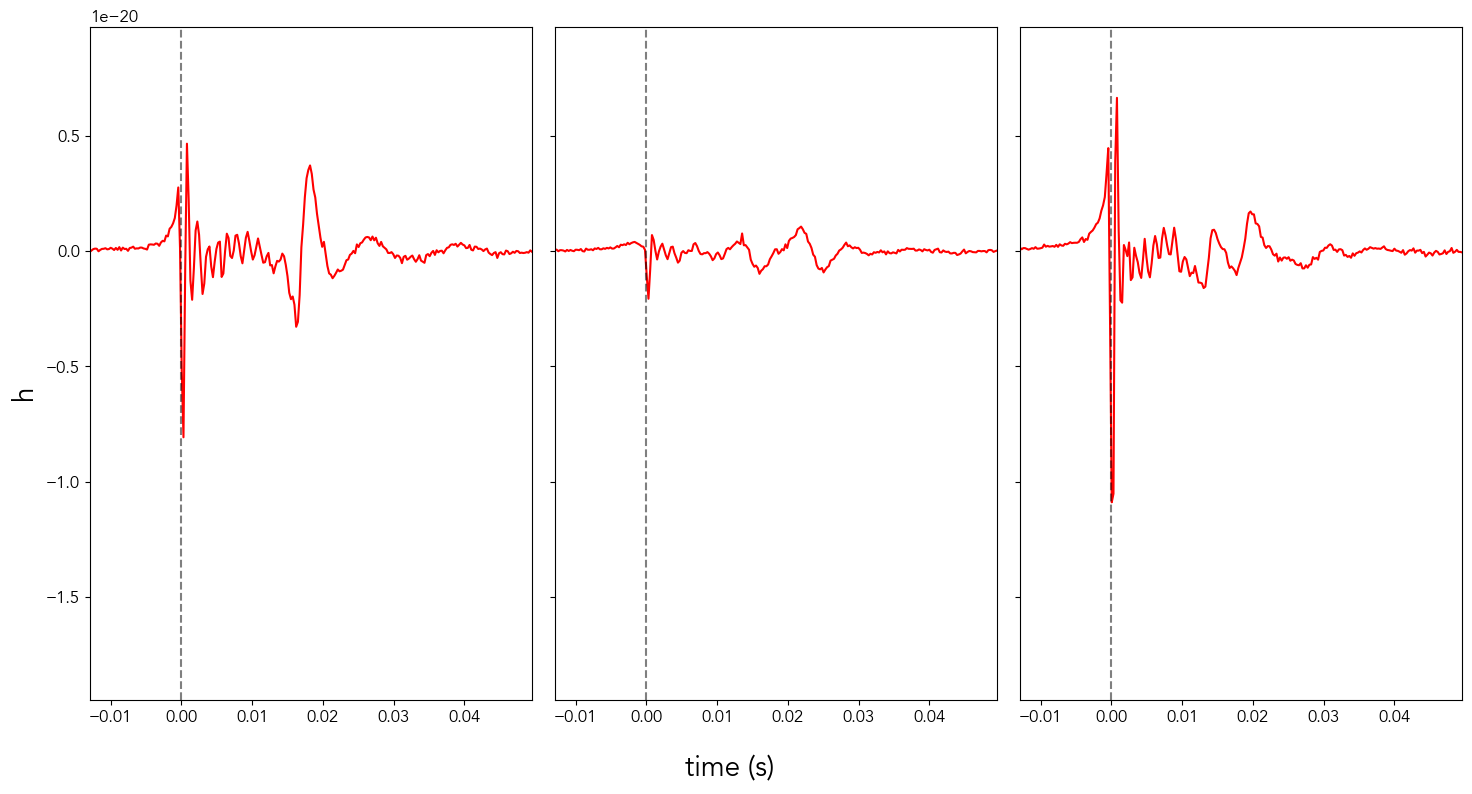

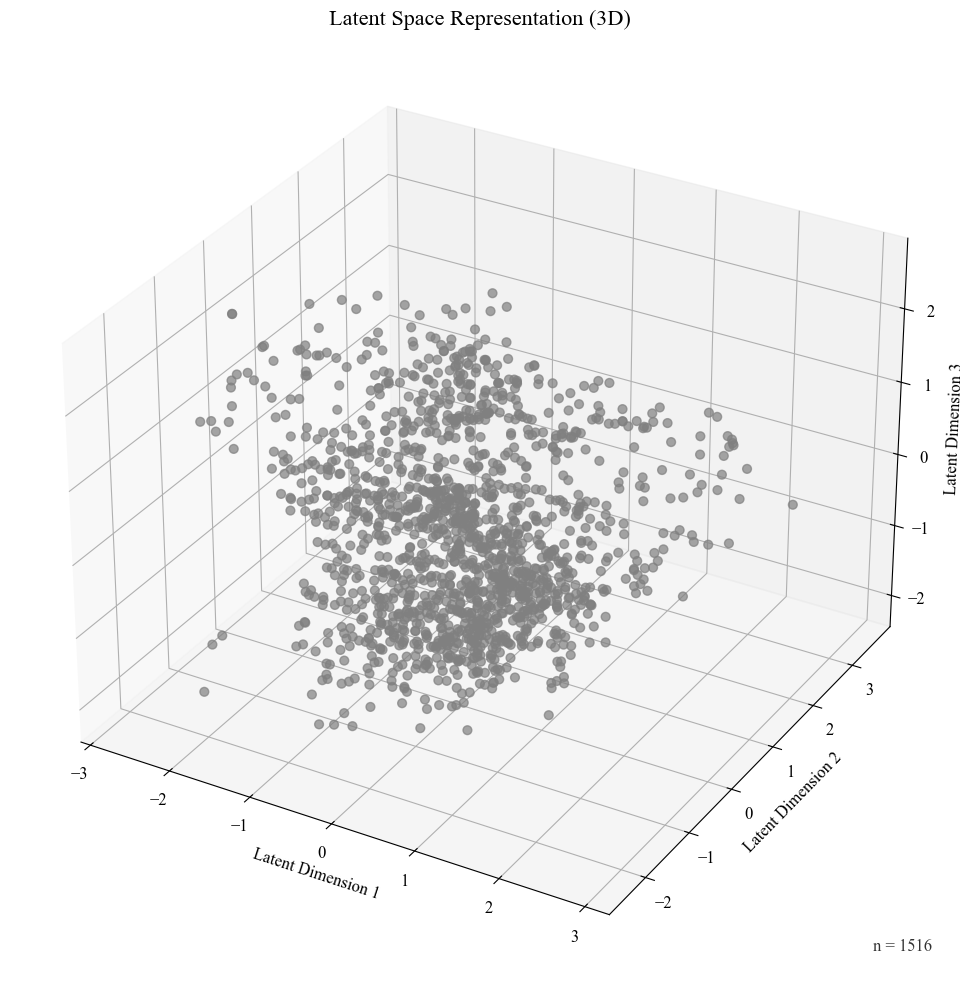

Epochs:  31%|███       | 79/256 [03:17<06:36,  2.24s/it]

Generated signals shape: (32, 256)


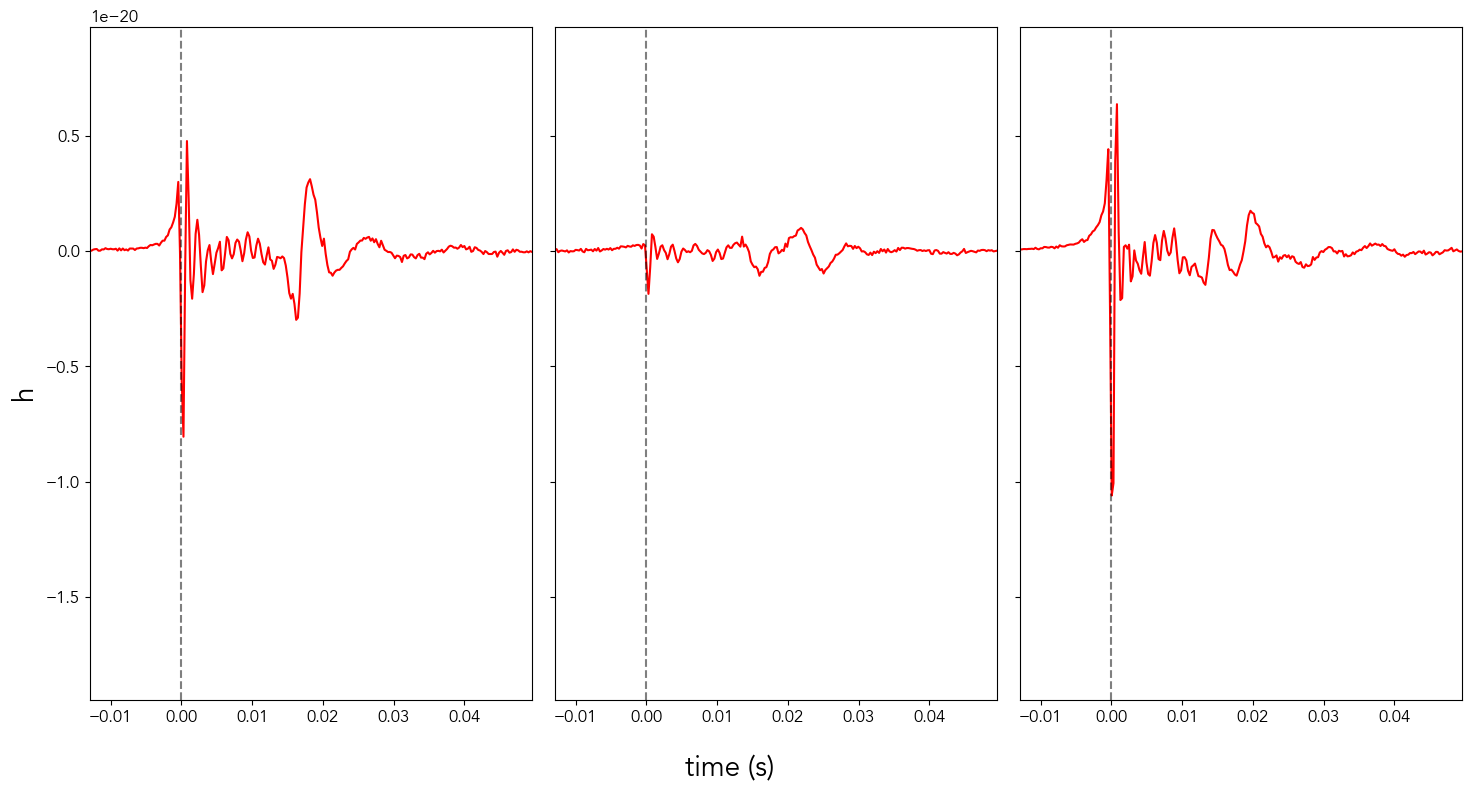

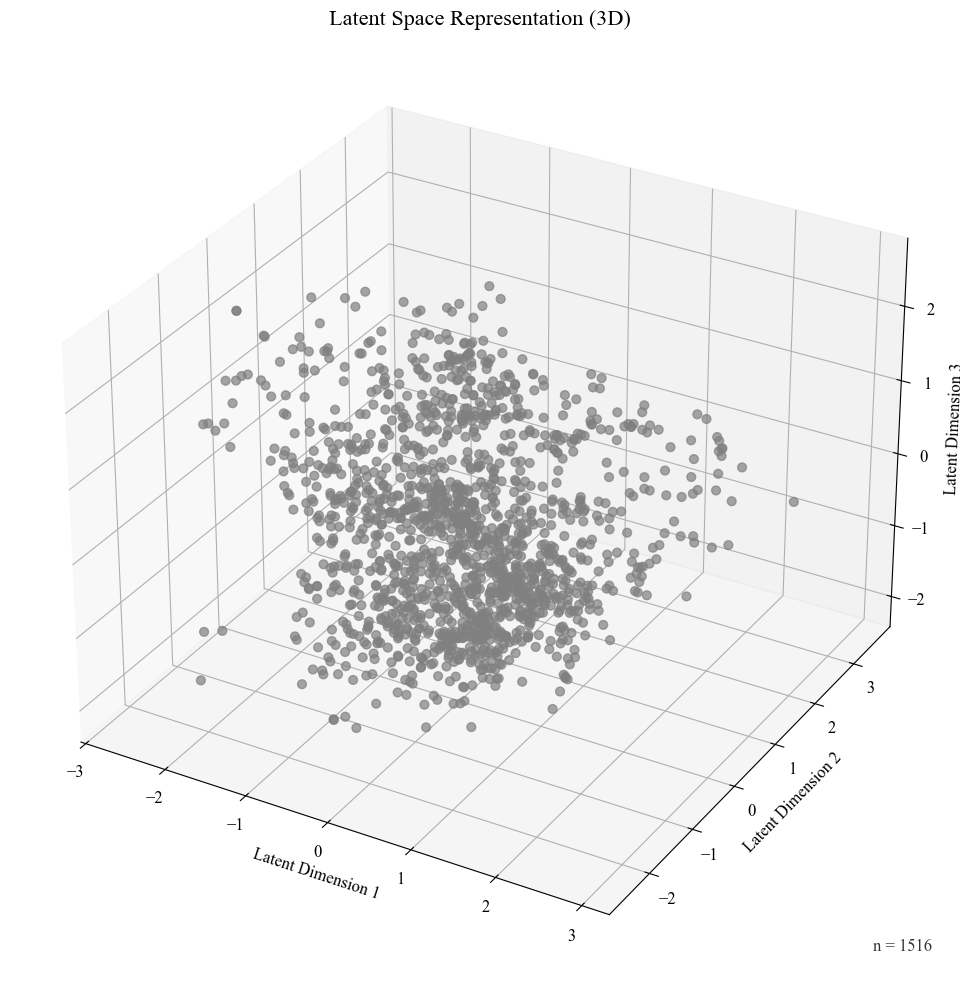

Epochs:  37%|███▋      | 95/256 [03:55<06:04,  2.26s/it]

Generated signals shape: (32, 256)


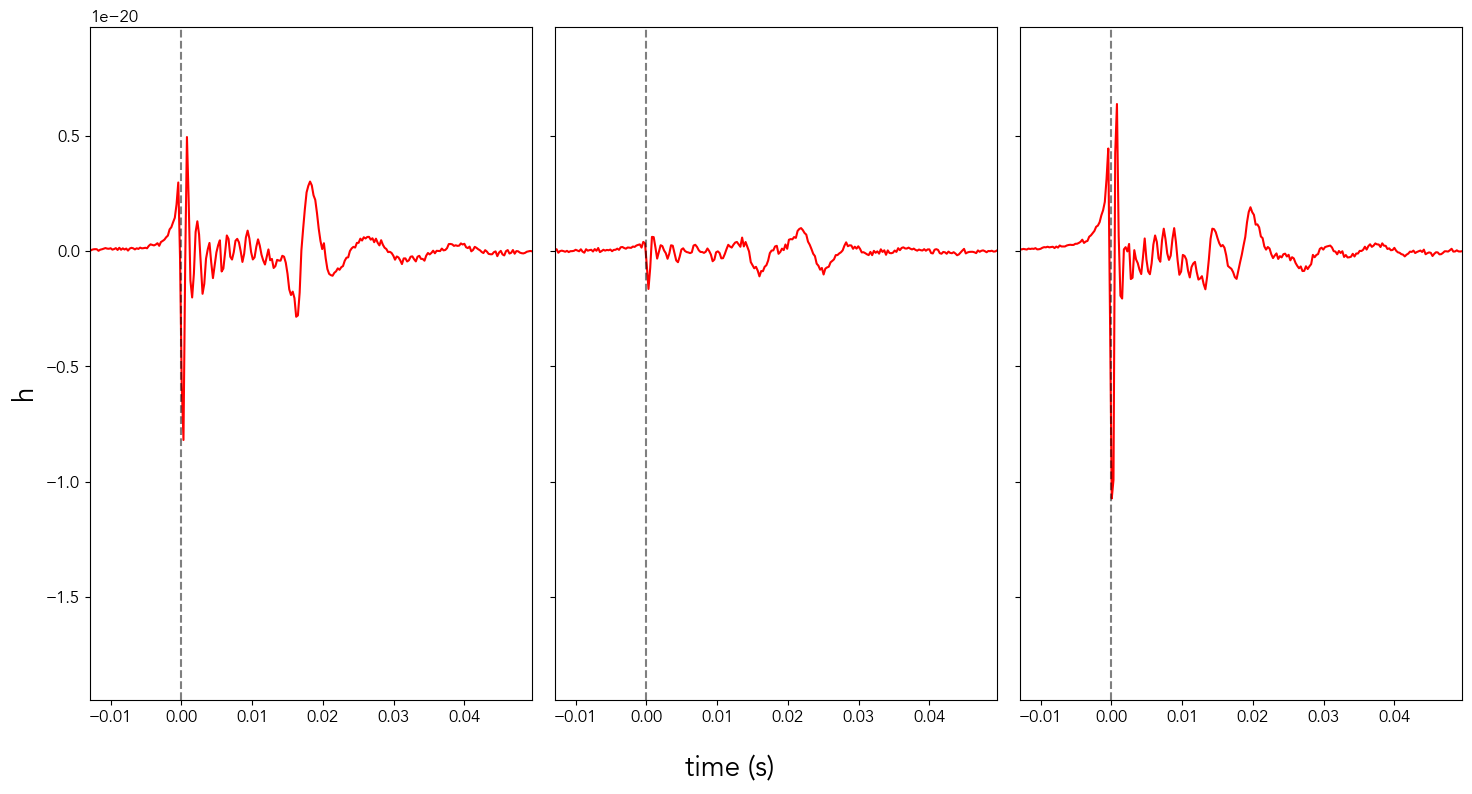

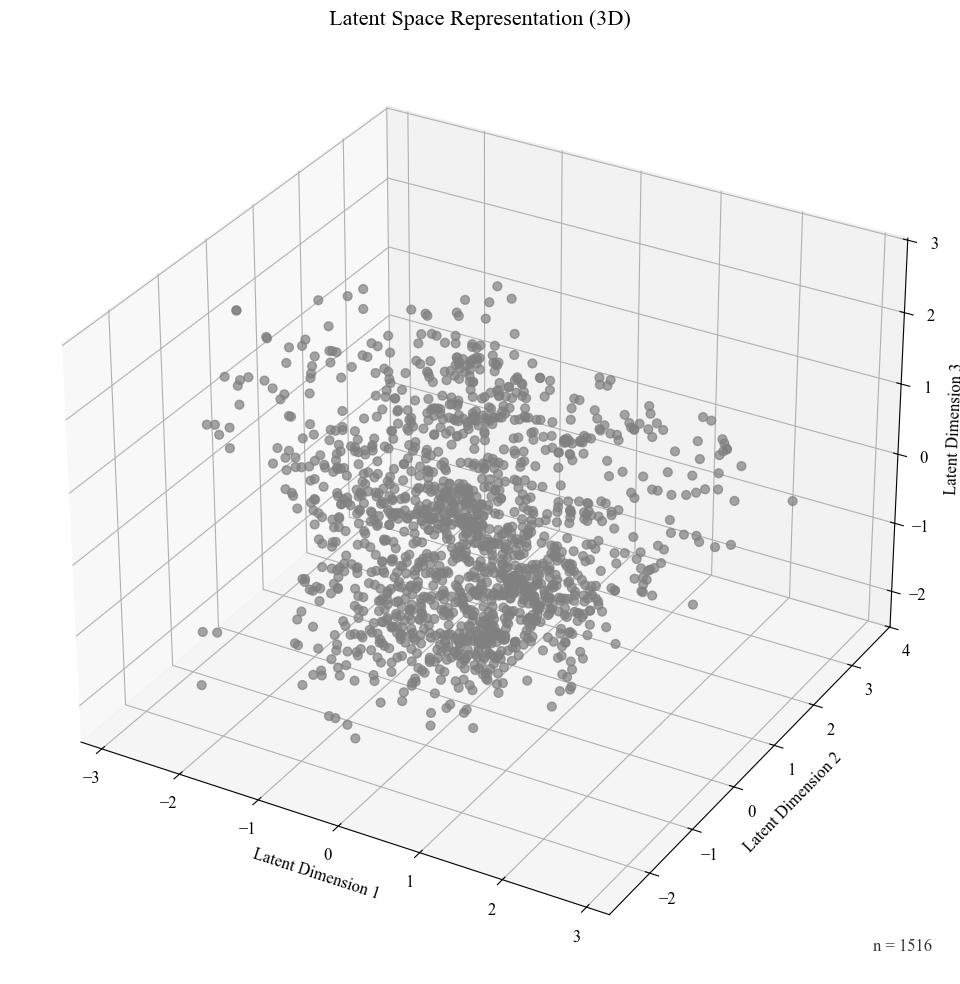

Epochs:  43%|████▎     | 111/256 [04:32<05:29,  2.27s/it]

Generated signals shape: (32, 256)


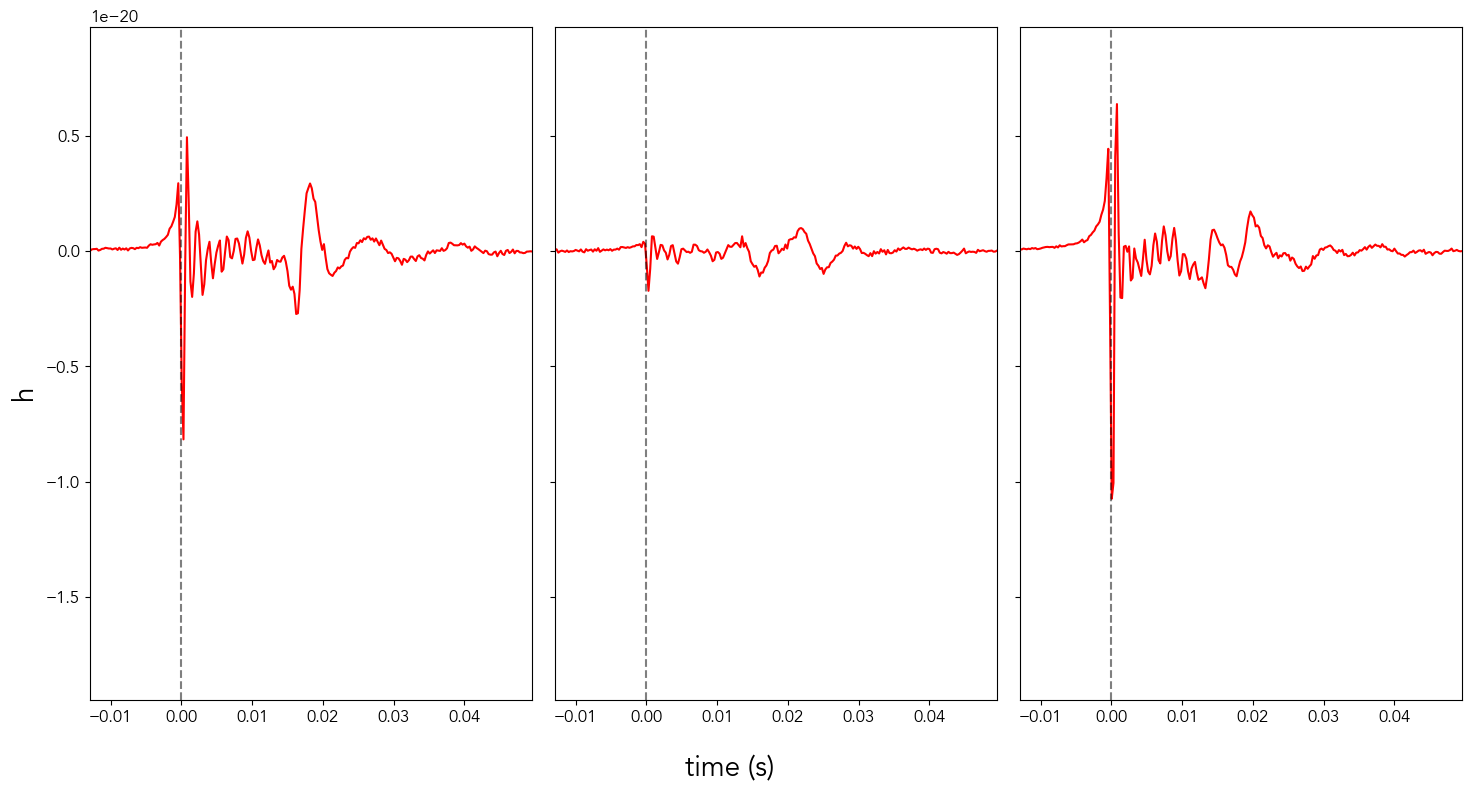

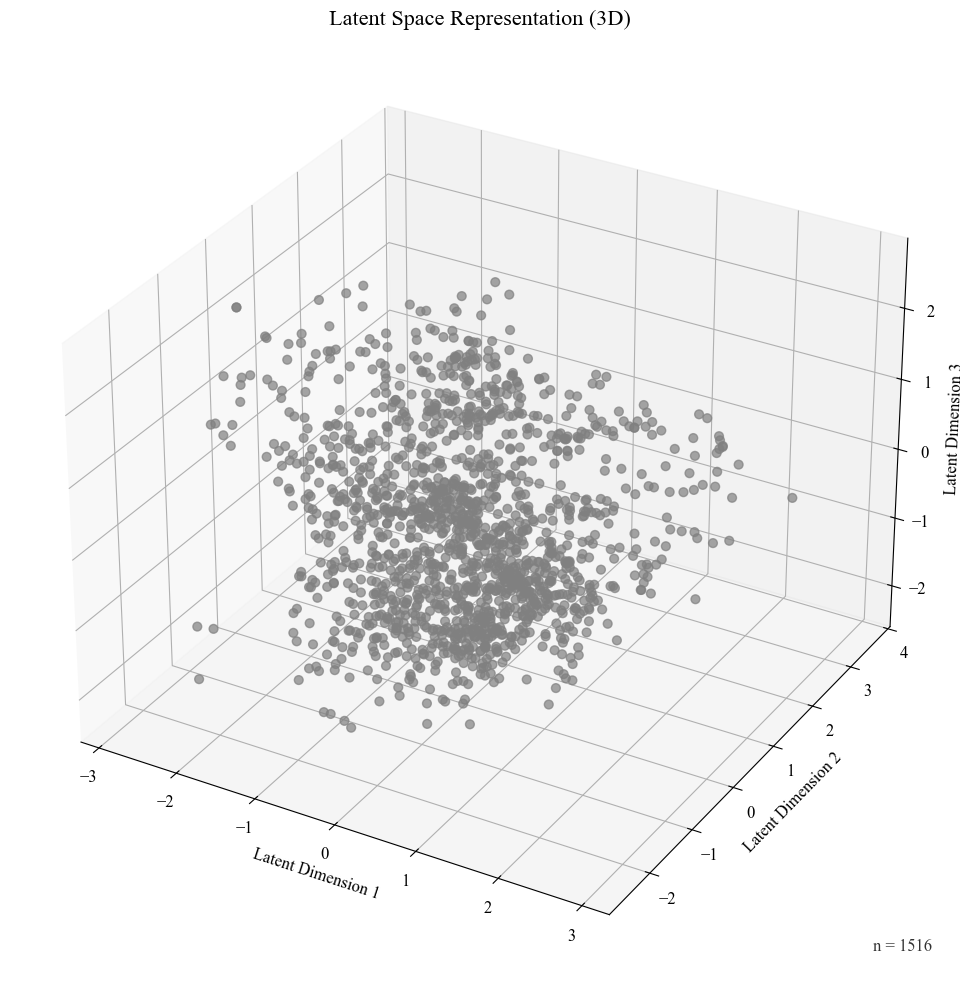

Epochs:  50%|████▉     | 127/256 [05:12<05:14,  2.44s/it]

Generated signals shape: (32, 256)


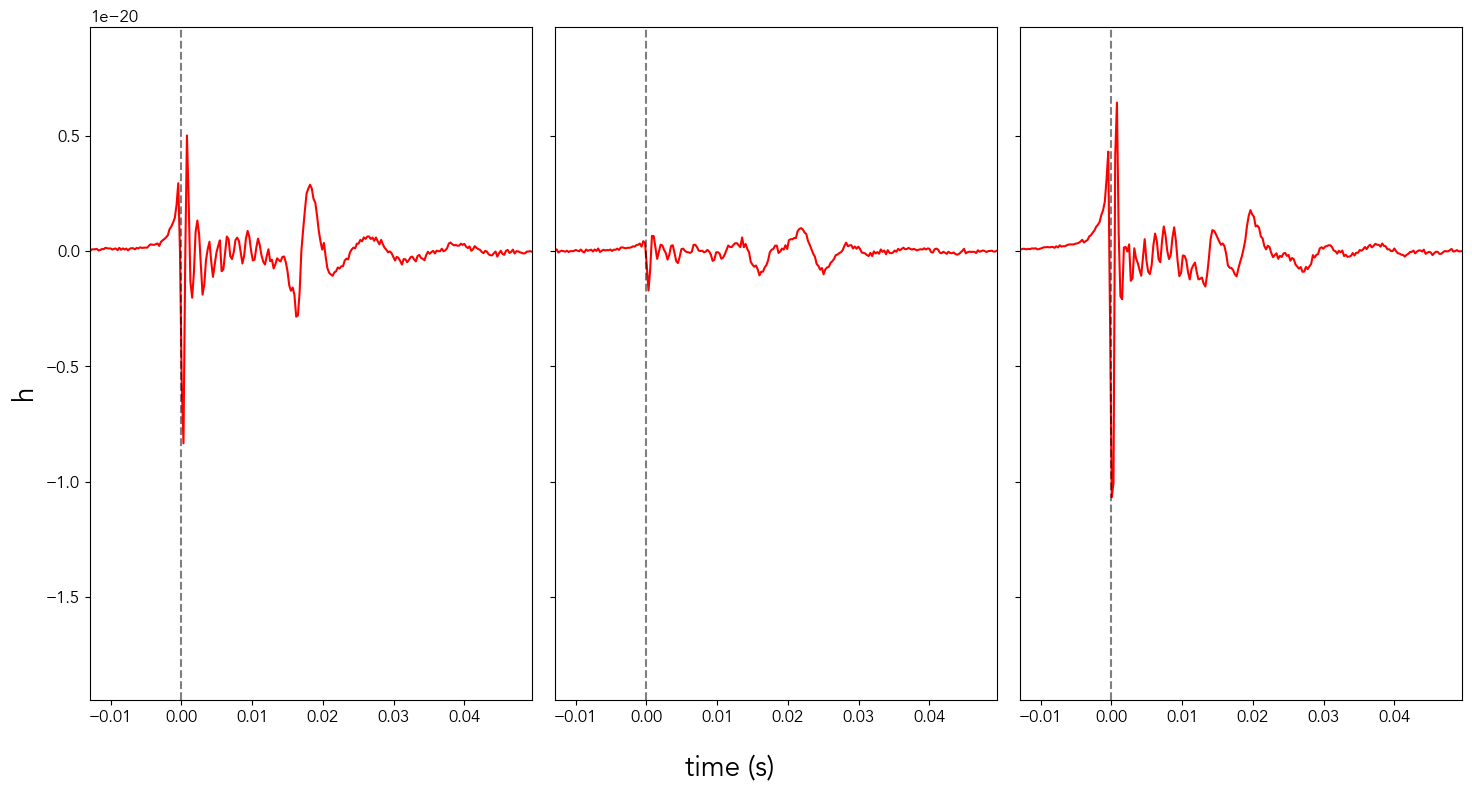

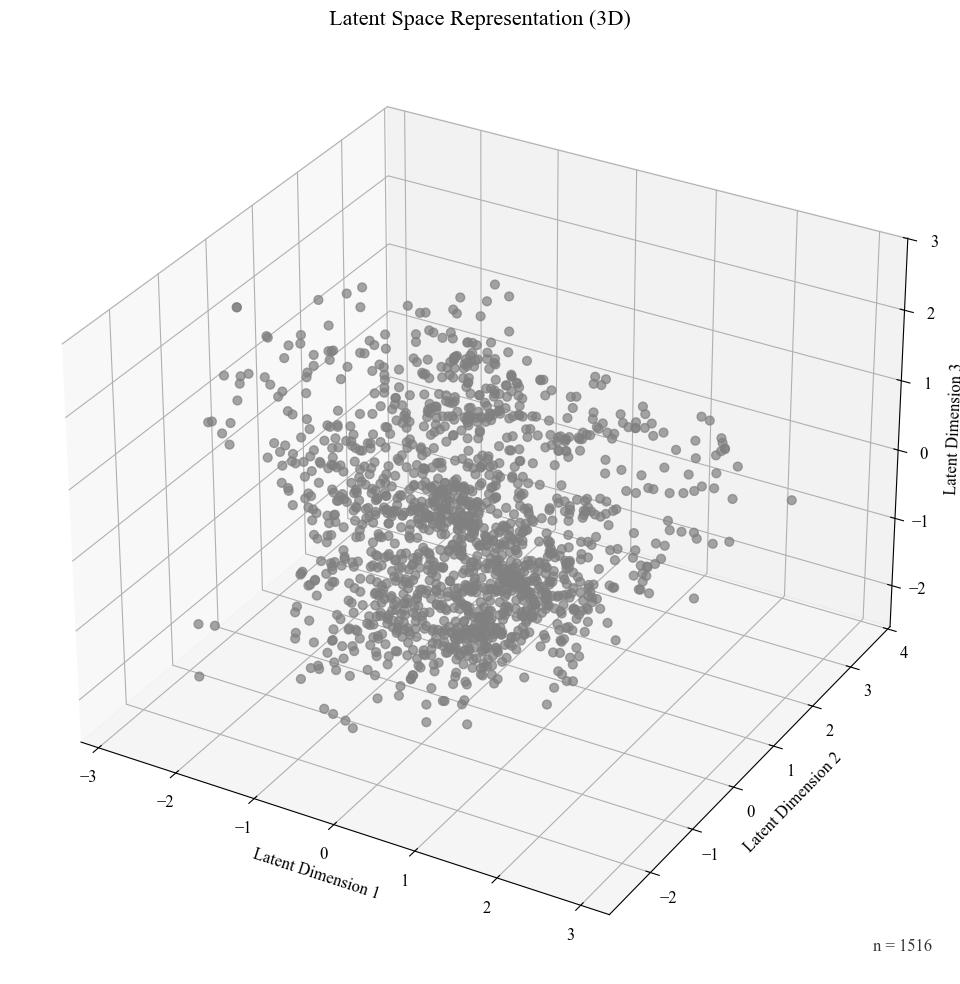

Epochs:  56%|█████▌    | 143/256 [05:49<04:14,  2.25s/it]

Generated signals shape: (32, 256)


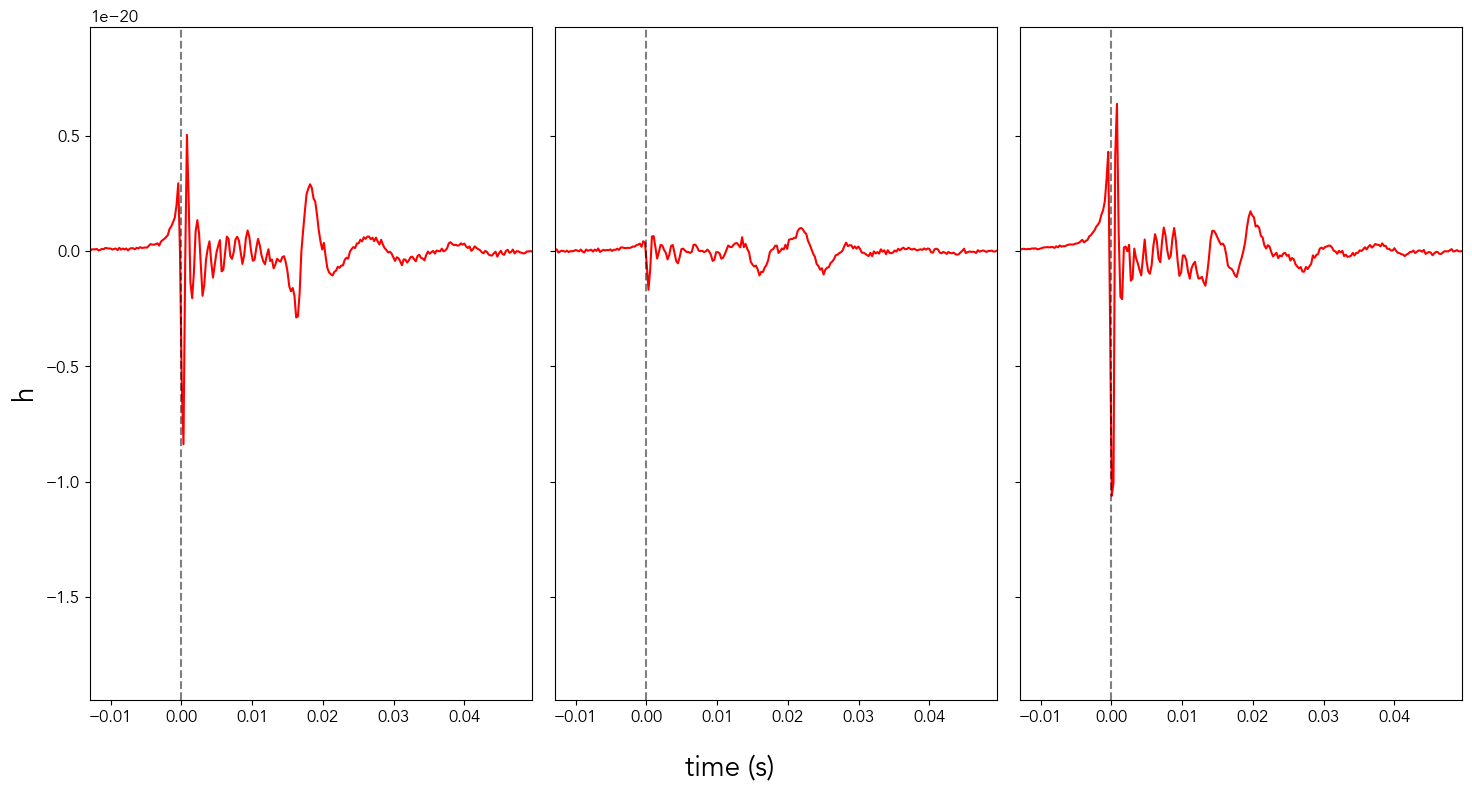

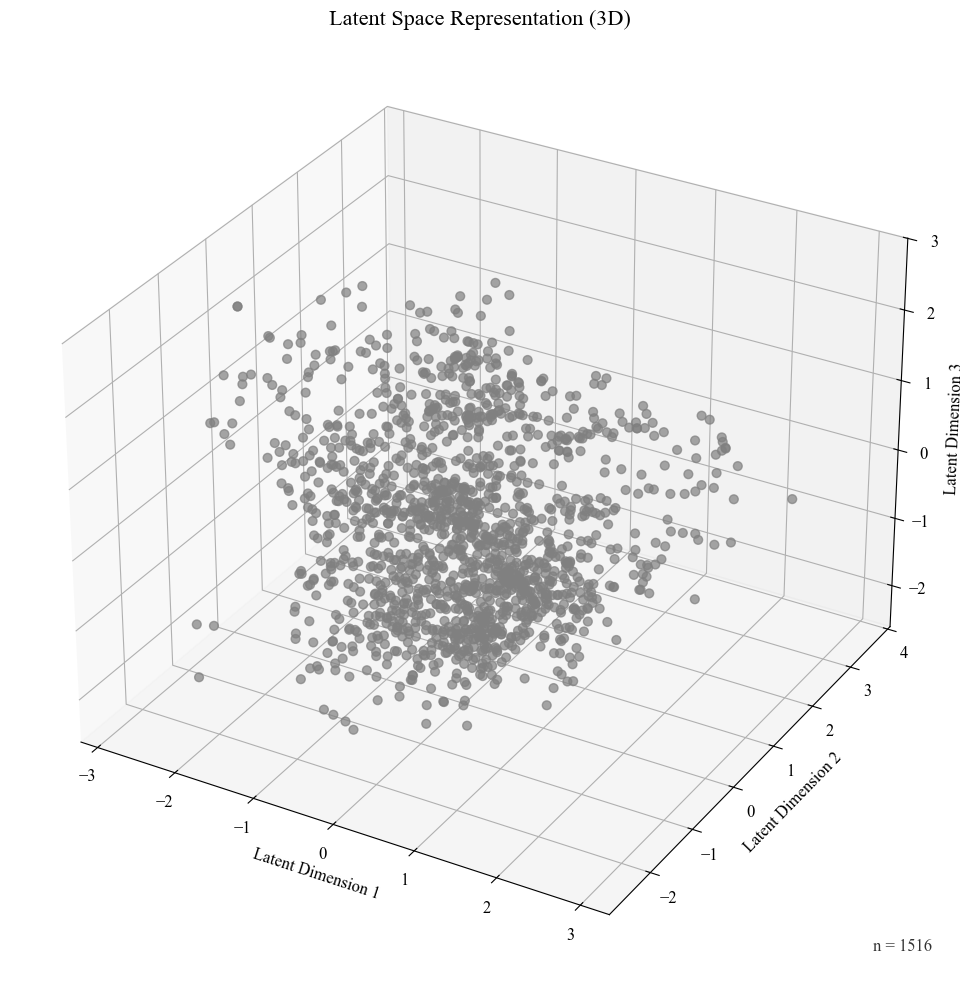

Epochs:  62%|██████▏   | 159/256 [06:27<03:38,  2.25s/it]

Generated signals shape: (32, 256)


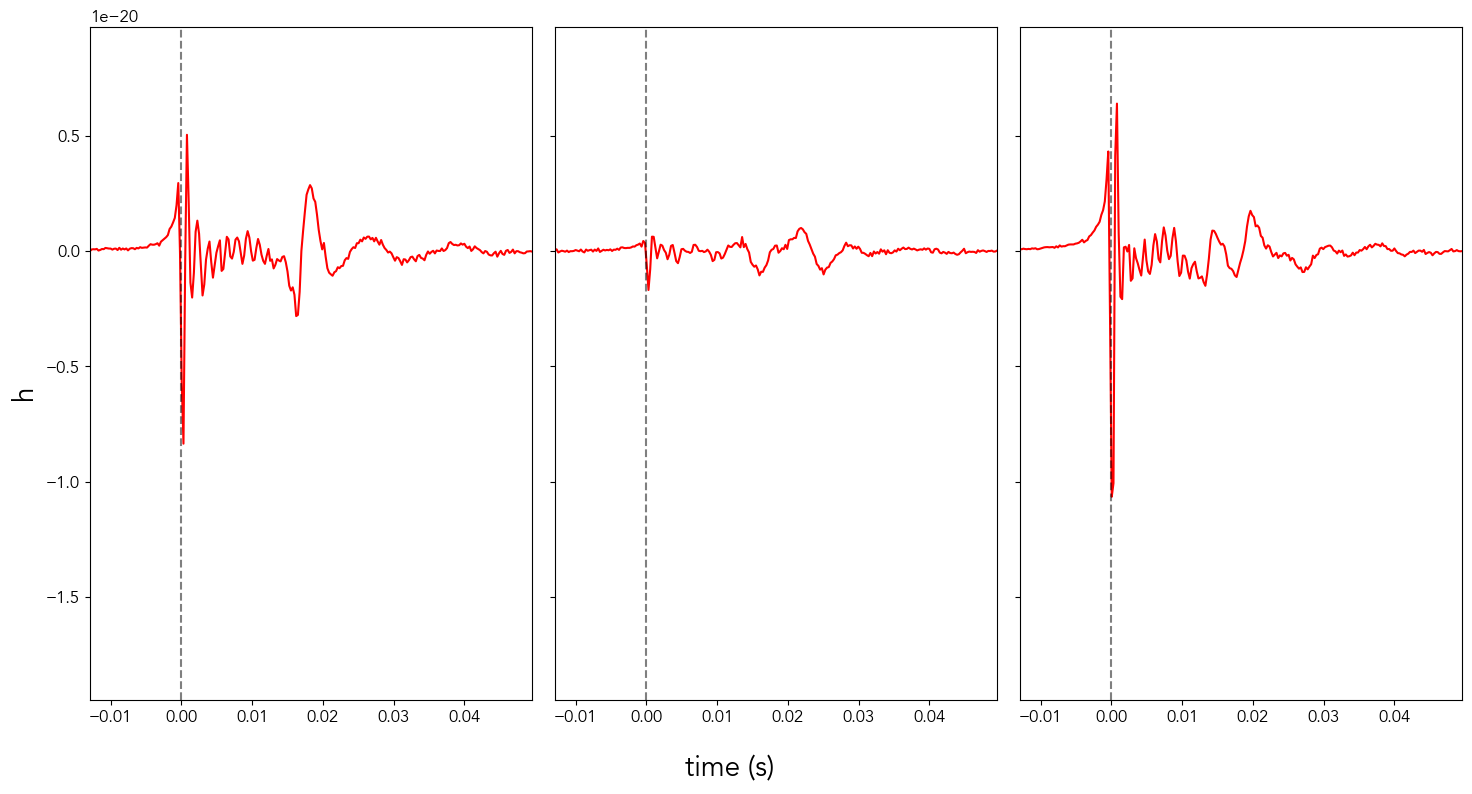

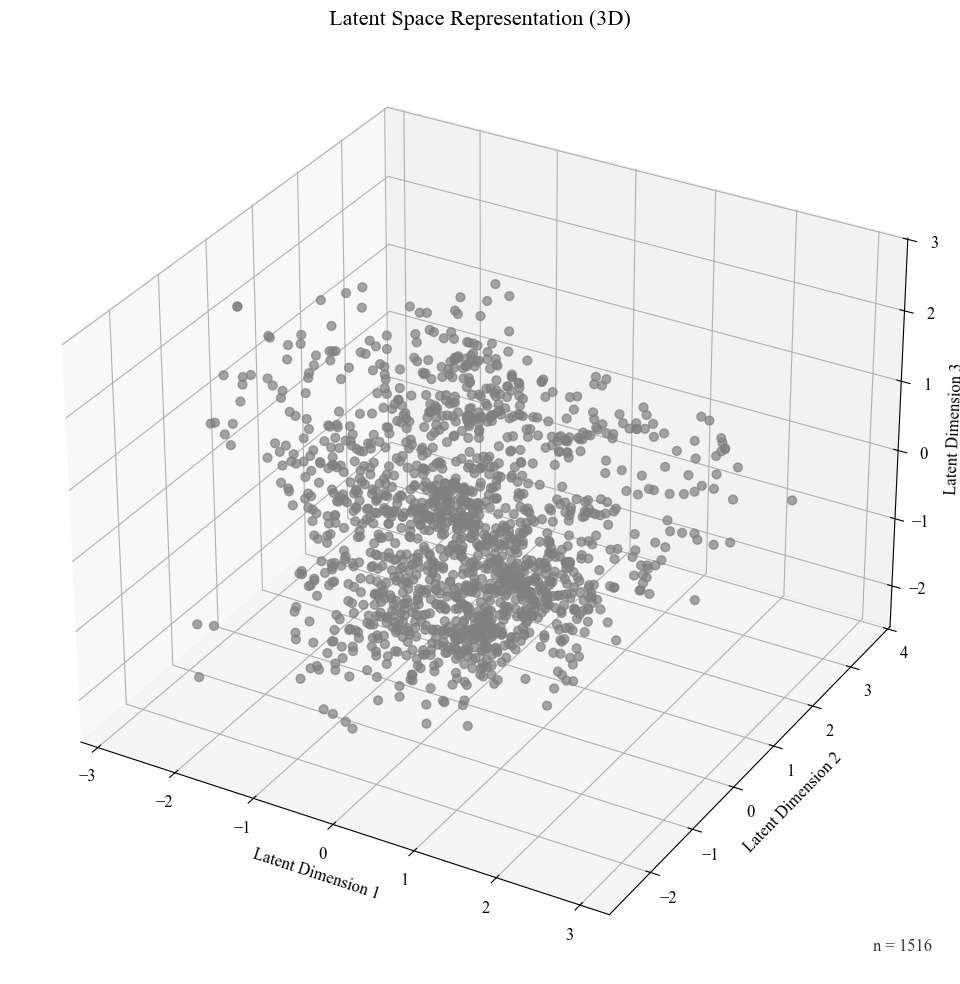

Epochs:  68%|██████▊   | 175/256 [07:05<03:02,  2.26s/it]

Generated signals shape: (32, 256)


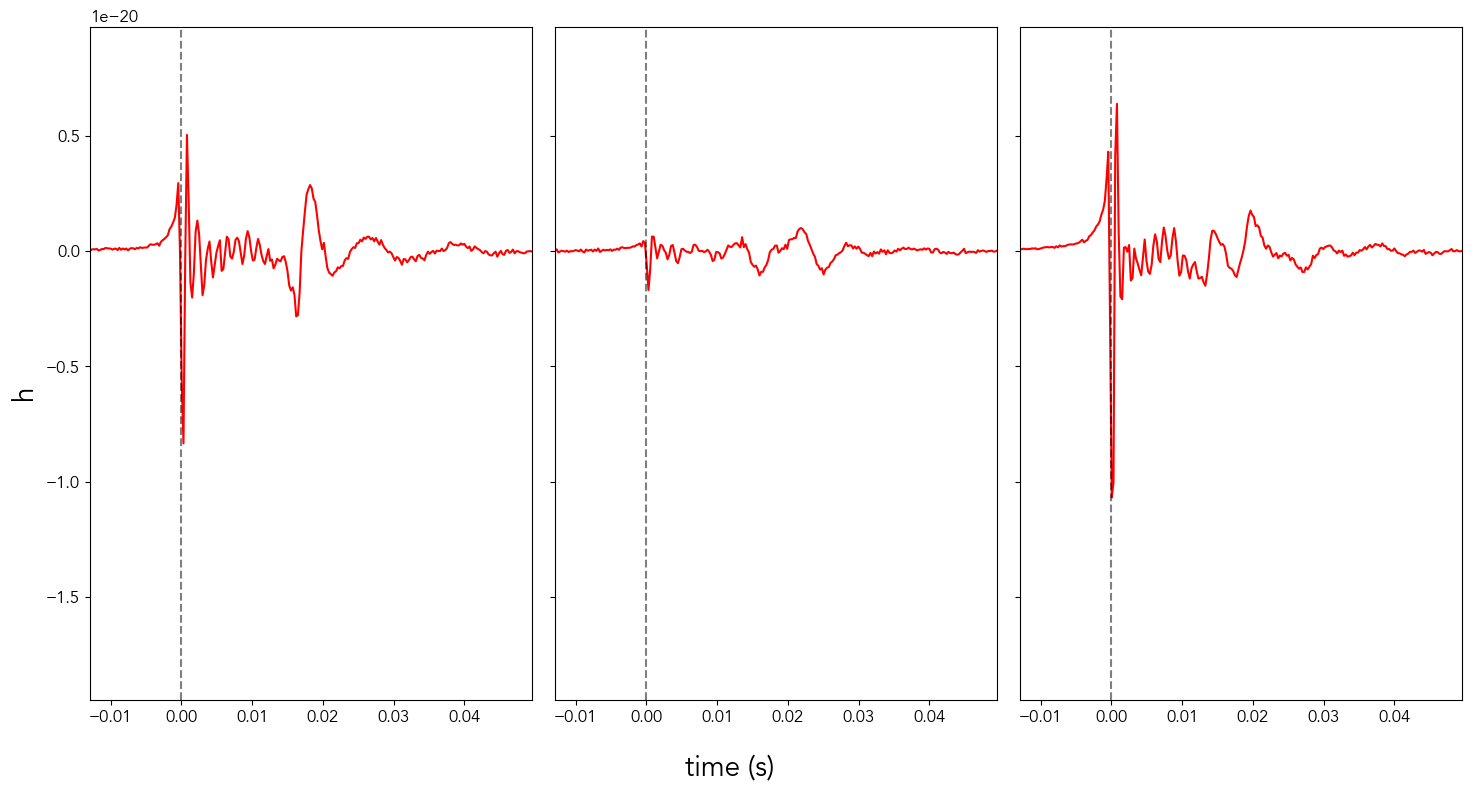

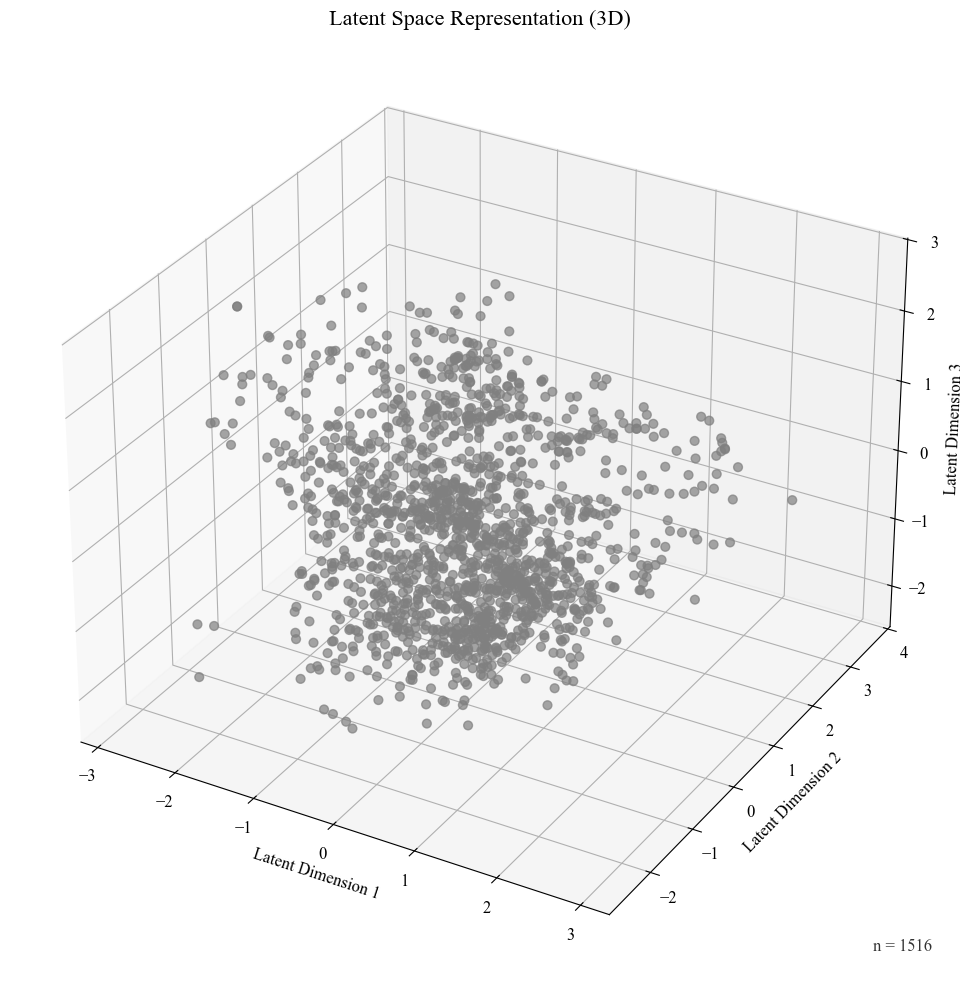

Epochs:  75%|███████▍  | 191/256 [07:46<02:37,  2.42s/it]

Generated signals shape: (32, 256)


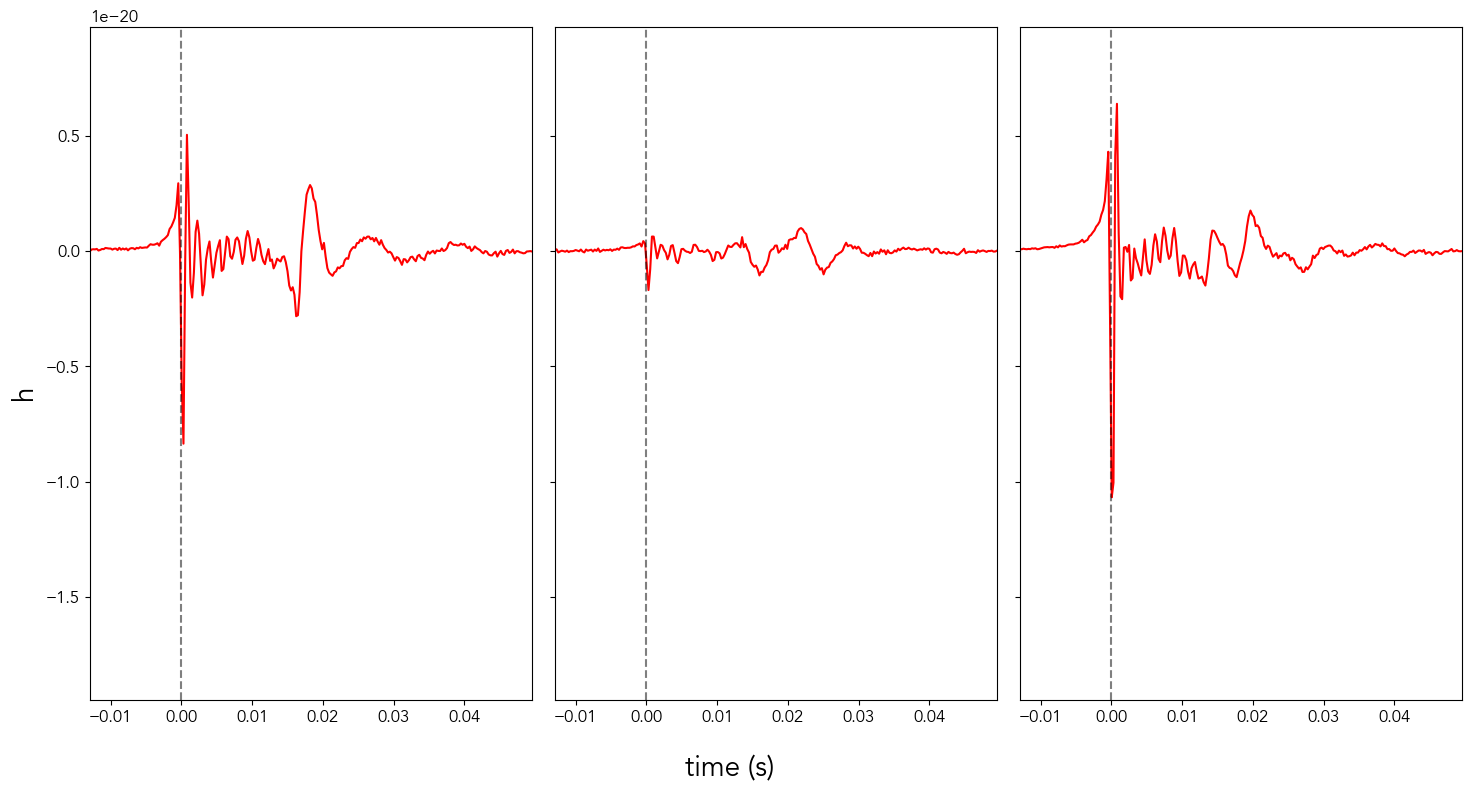

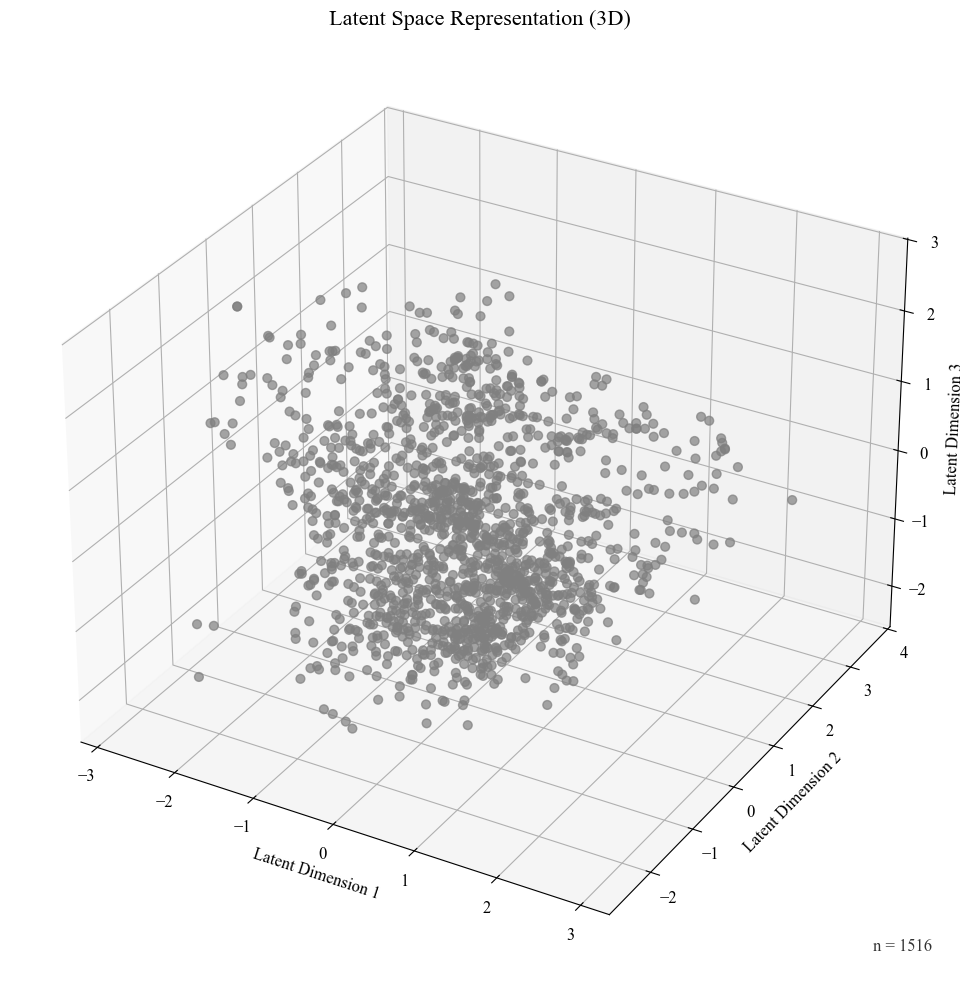

Epochs:  81%|████████  | 207/256 [08:26<01:59,  2.43s/it]

Generated signals shape: (32, 256)


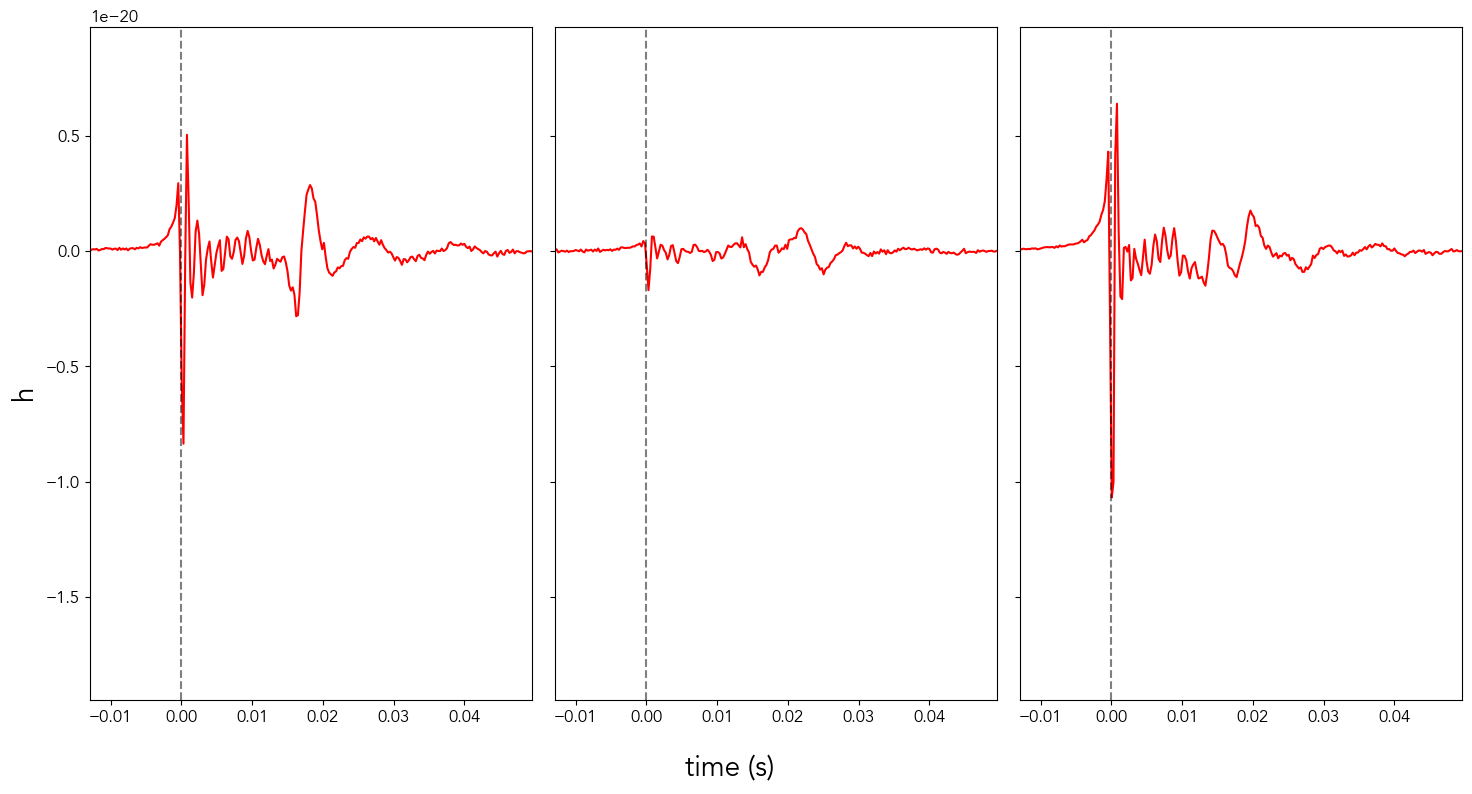

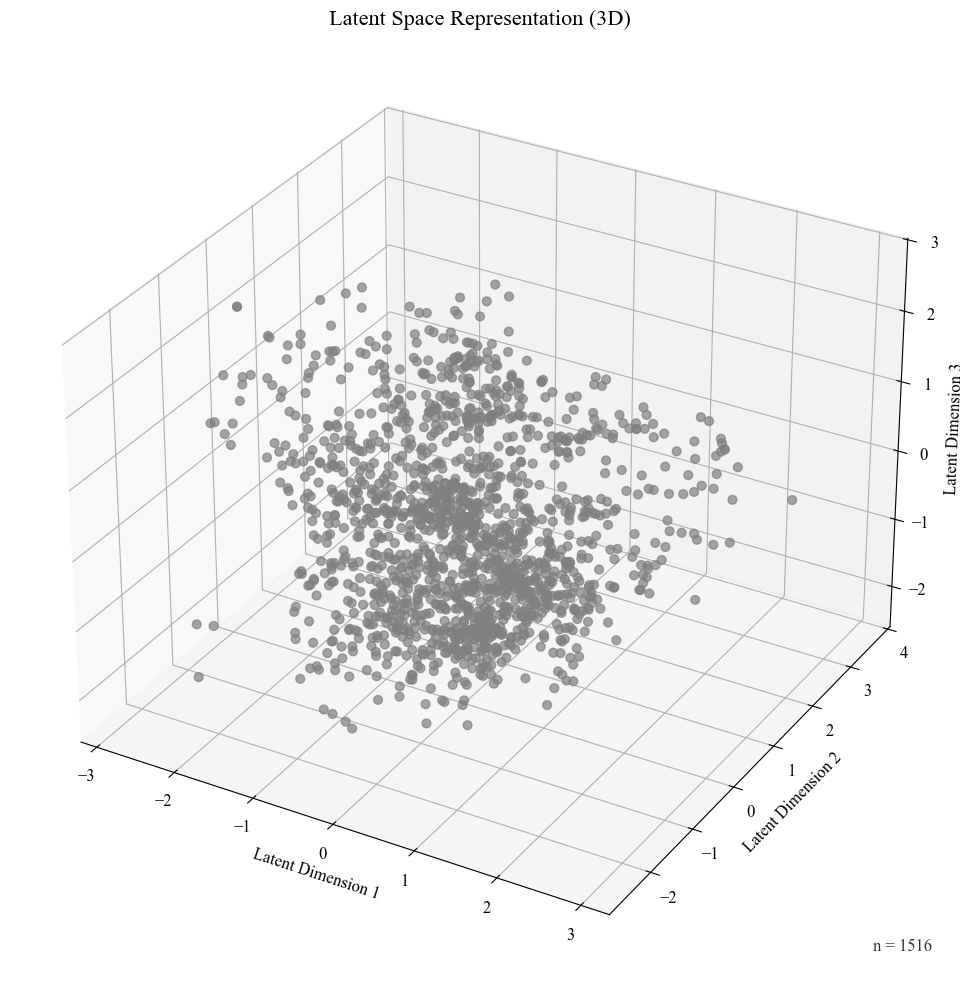

Epochs:  87%|████████▋ | 223/256 [09:08<01:19,  2.42s/it]

Generated signals shape: (32, 256)


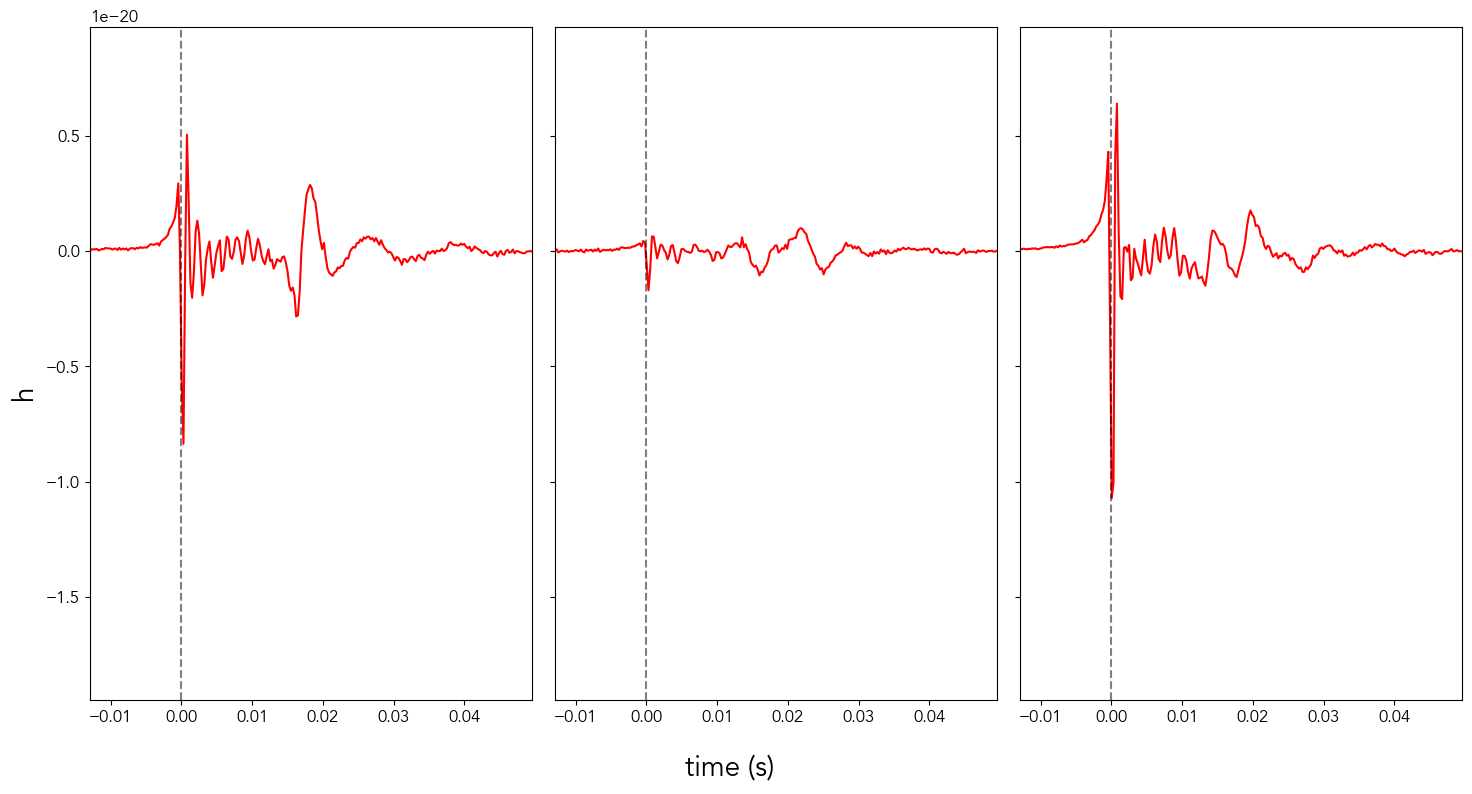

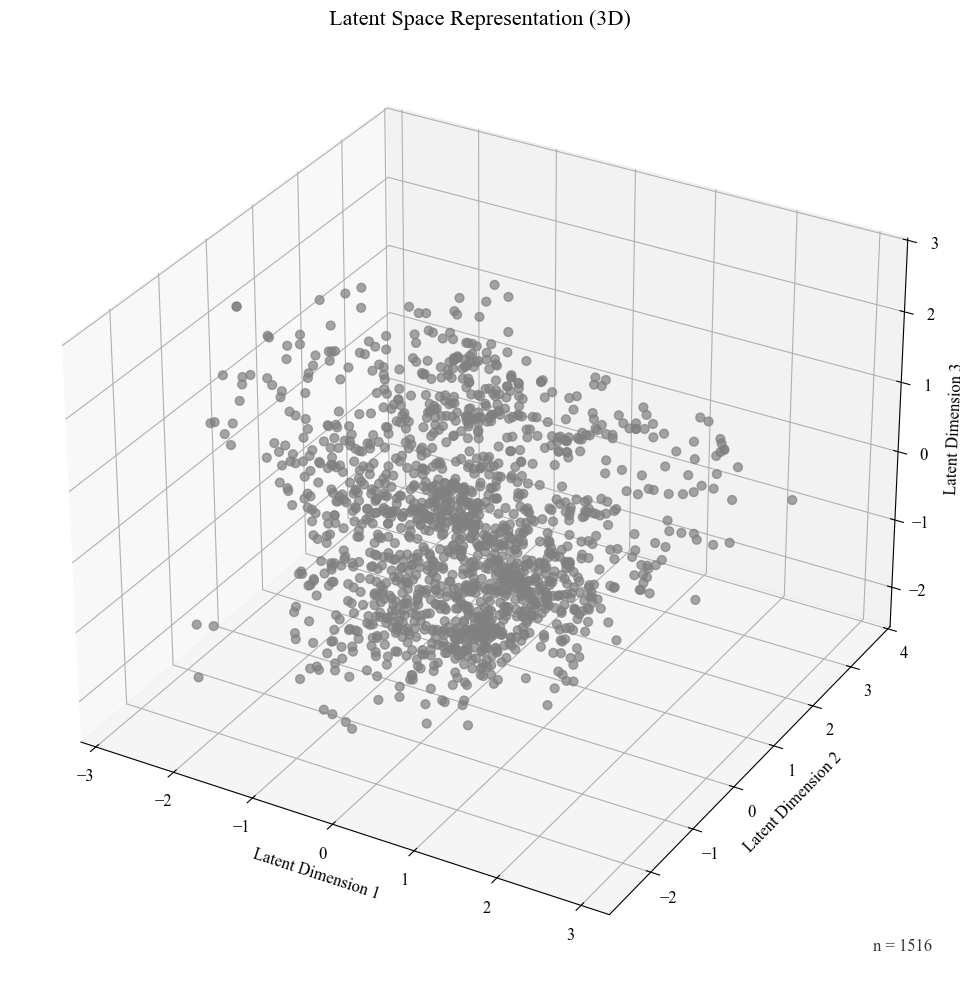

Epochs:  93%|█████████▎| 239/256 [09:49<00:40,  2.37s/it]

Generated signals shape: (32, 256)


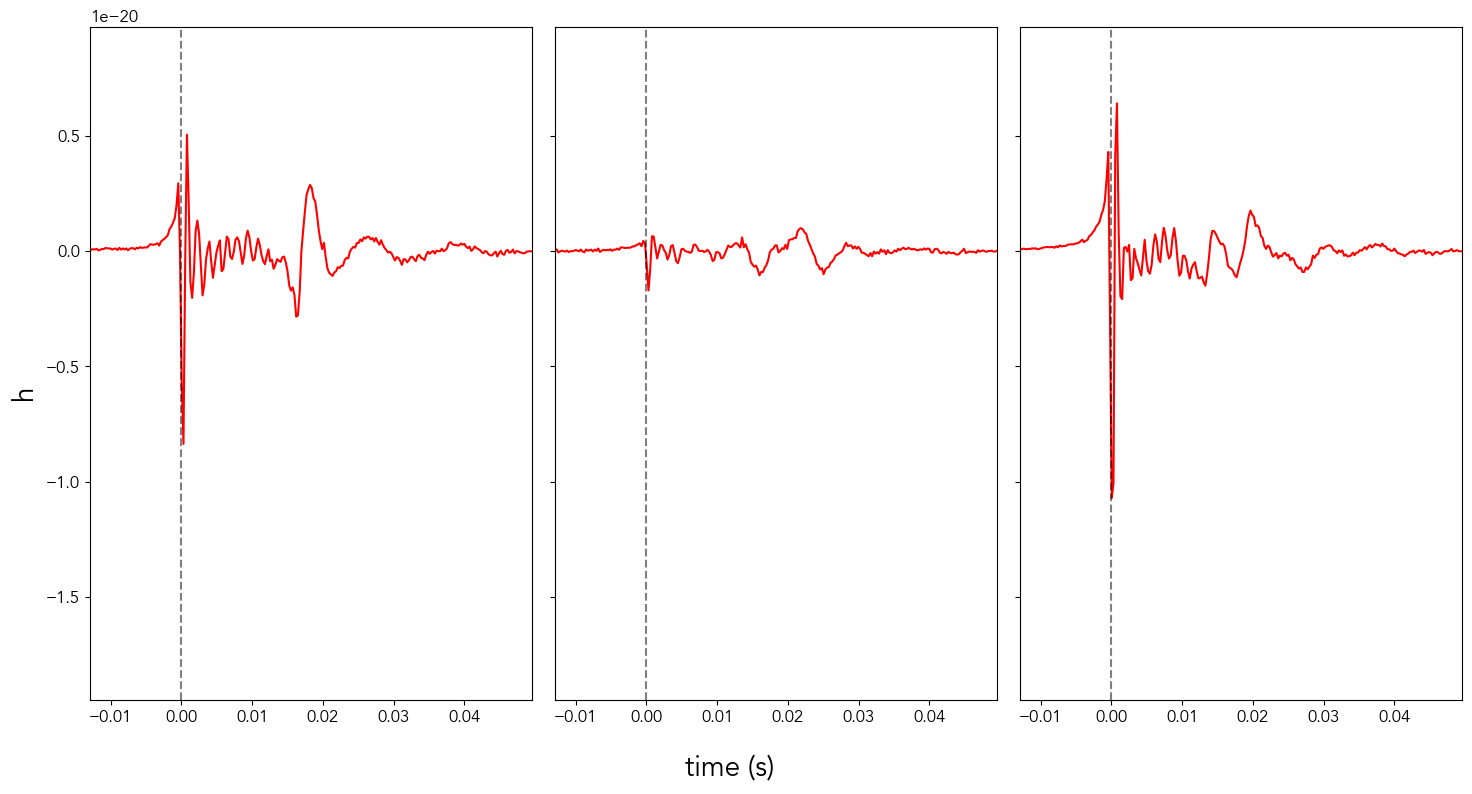

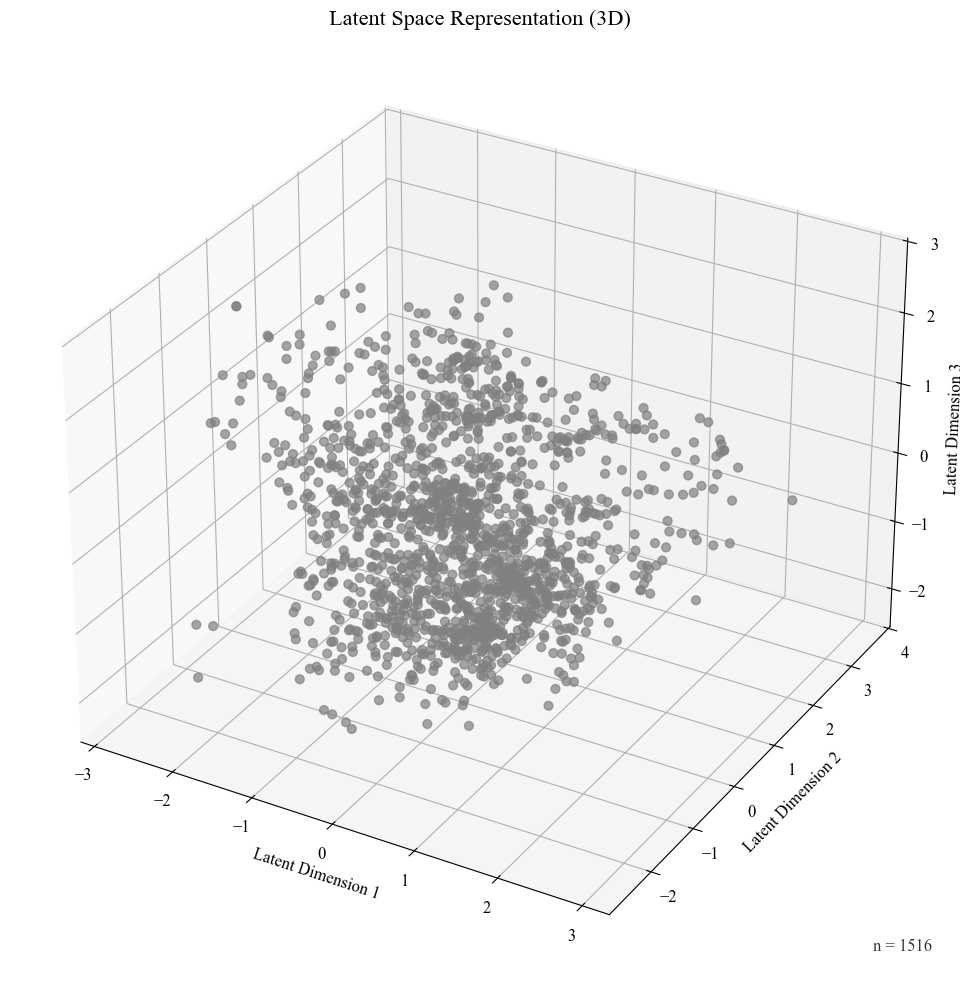

Epochs: 100%|█████████▉| 255/256 [10:27<00:02,  2.29s/it]

Generated signals shape: (32, 256)


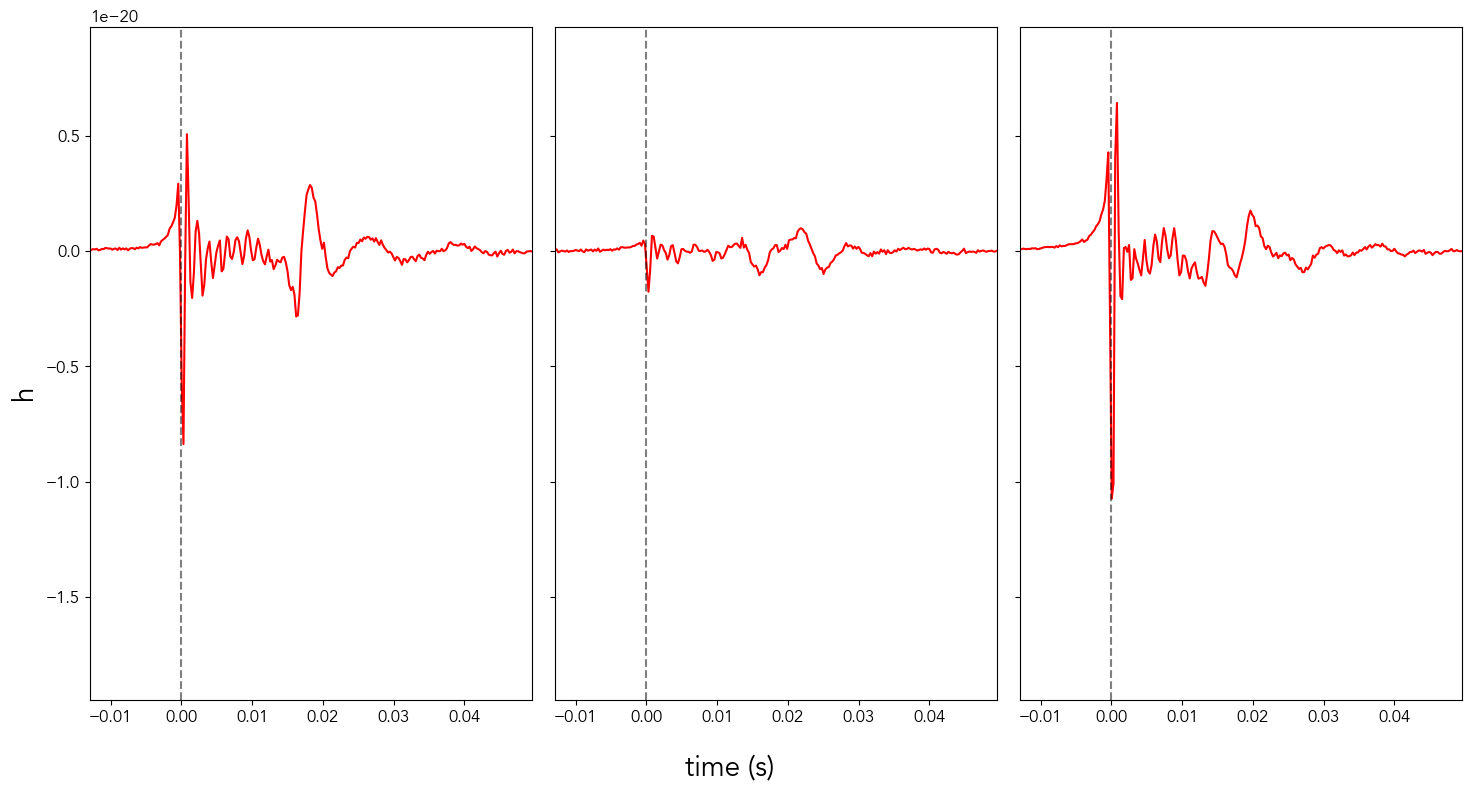

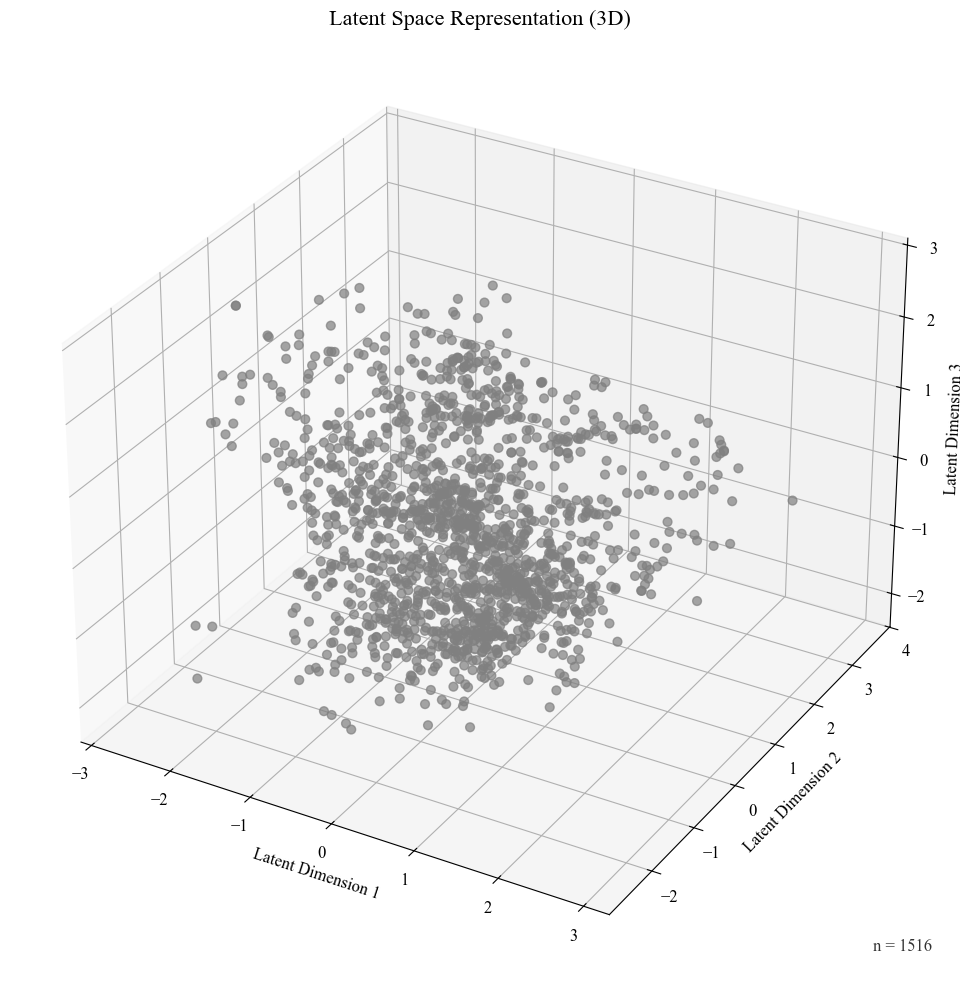

Epochs: 100%|██████████| 256/256 [10:31<00:00,  2.47s/it]


Training Time: 10.53min
Saved VAE model to outdir/generator_weights.pt

Starting Flow Training
Epoch [1/500] | Flow Train NLL: 0.3295 | Val NLL: 0.3026 | Grad Norm: 25.2951 ✓ (Best)
Epoch [2/500] | Flow Train NLL: 0.2226 | Val NLL: 0.1891 | Grad Norm: 17.1473 ✓ (Best)
Epoch [3/500] | Flow Train NLL: 0.1407 | Val NLL: 0.1357 | Grad Norm: 122.6664 ✓ (Best)
Epoch [4/500] | Flow Train NLL: 0.1203 | Val NLL: 0.1432 | Grad Norm: 255.9466 (Patience: 1/20)
Epoch [5/500] | Flow Train NLL: 0.1195 | Val NLL: 0.1171 | Grad Norm: 522.6147 ✓ (Best)
Epoch [6/500] | Flow Train NLL: 0.1047 | Val NLL: 0.1241 | Grad Norm: 388.3971 (Patience: 1/20)
Epoch [7/500] | Flow Train NLL: 0.1060 | Val NLL: 0.1057 | Grad Norm: 458.5871 ✓ (Best)
Epoch [8/500] | Flow Train NLL: 0.0933 | Val NLL: 0.0978 | Grad Norm: 304.3639 ✓ (Best)
Epoch [9/500] | Flow Train NLL: 0.0853 | Val NLL: 0.0971 | Grad Norm: 282.6994 ✓ (Best)
Epoch [10/500] | Flow Train NLL: 0.0757 | Val NLL: 0.0831 | Grad Norm: 255.6056 ✓ (Best)
Epoch [11/

In [7]:
trainer.train()


Plotting Flow NLL Losses...

Plotting Flow Gradient Norms...


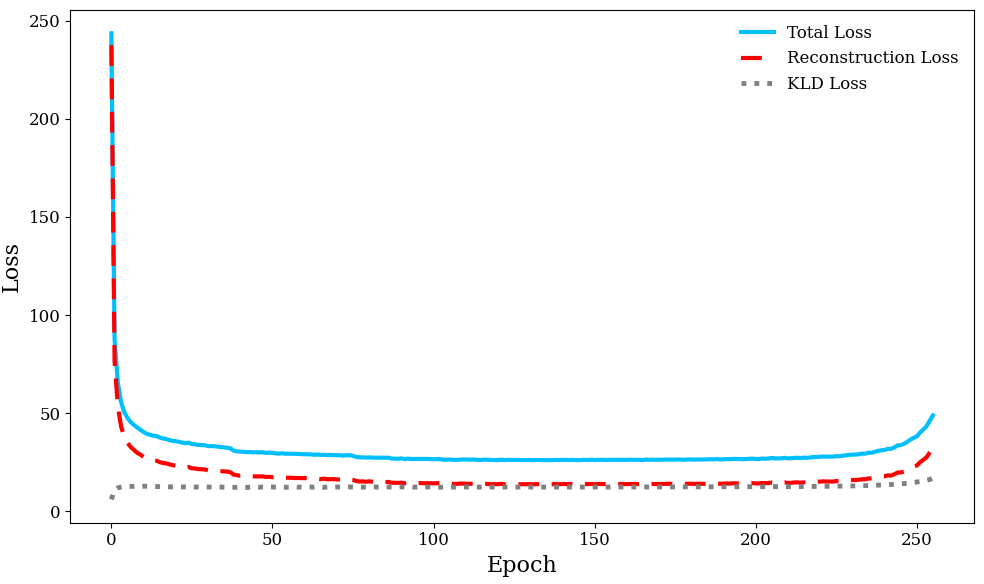

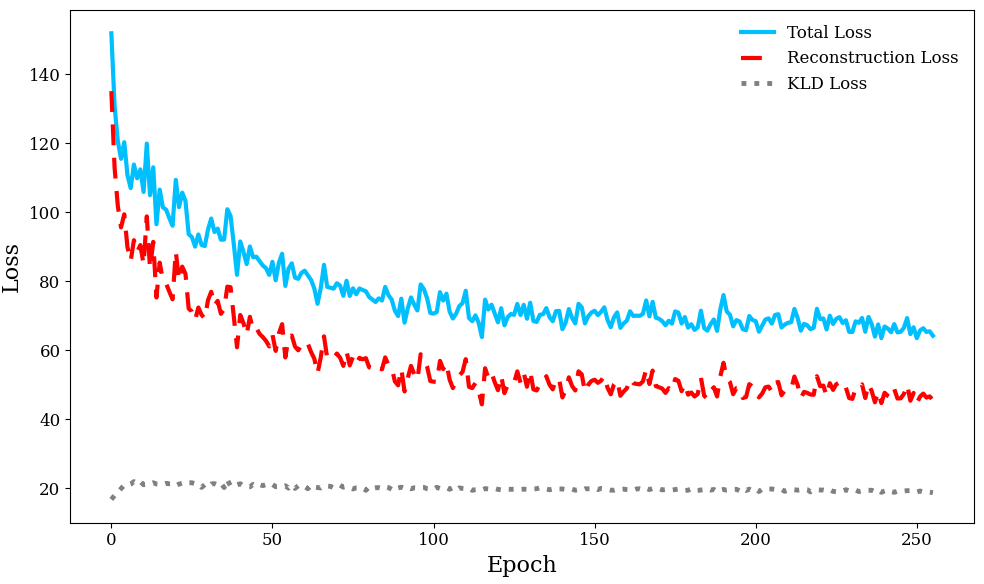

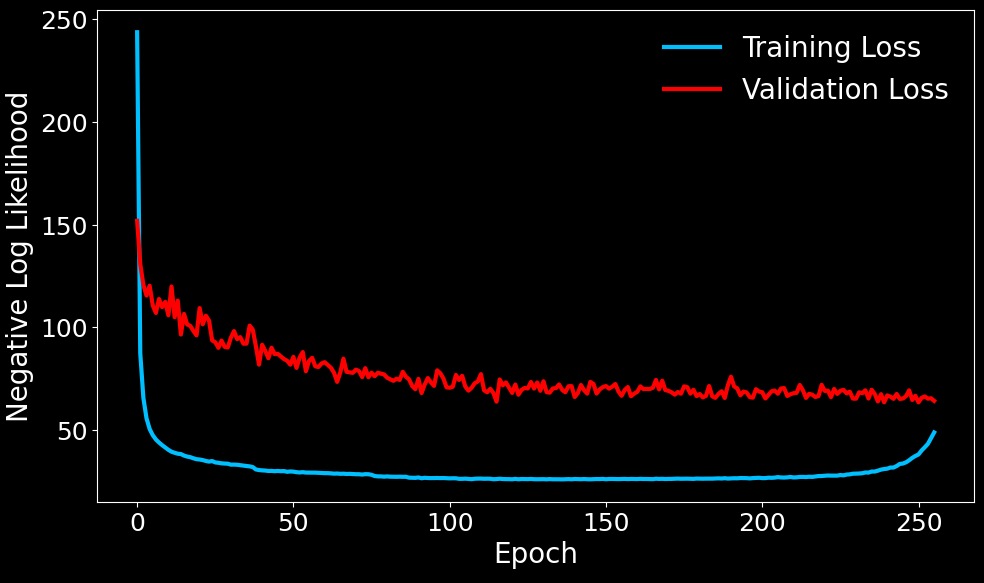

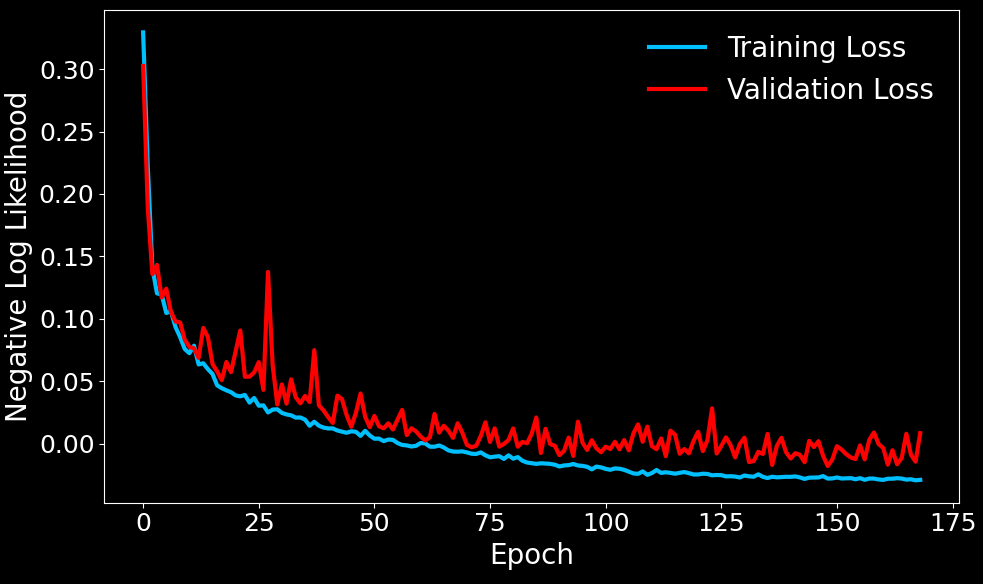

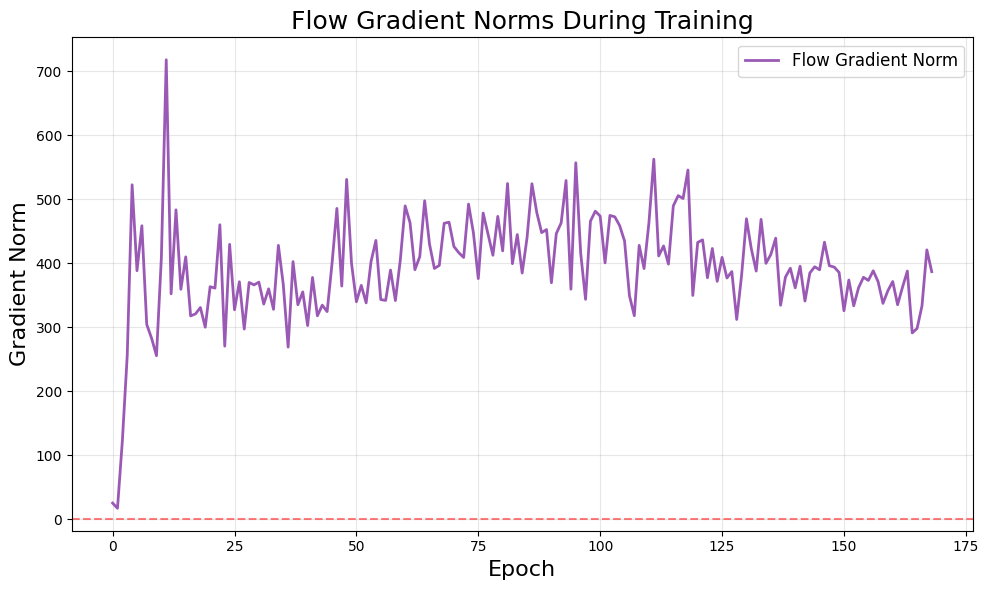

In [8]:
trainer.display_results()

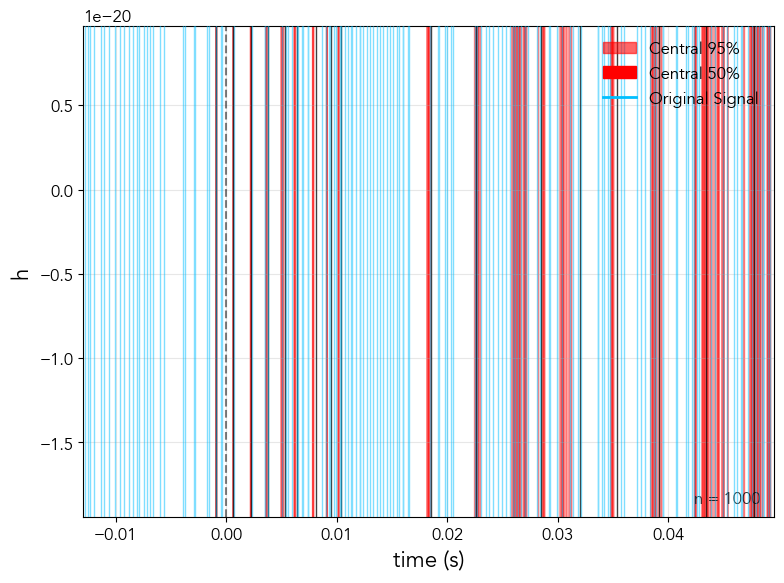

In [9]:
index = 160
trainer.val_loader.dataset.update_snr(30)
signal, noisy_signal, params = trainer.val_loader.dataset.__getitem__(index)

trainer.plot_reconstruction_distribution(
    num_samples=1000,
    background="white",
    font_family="sans-serif",
    font_name="Avenir"
)

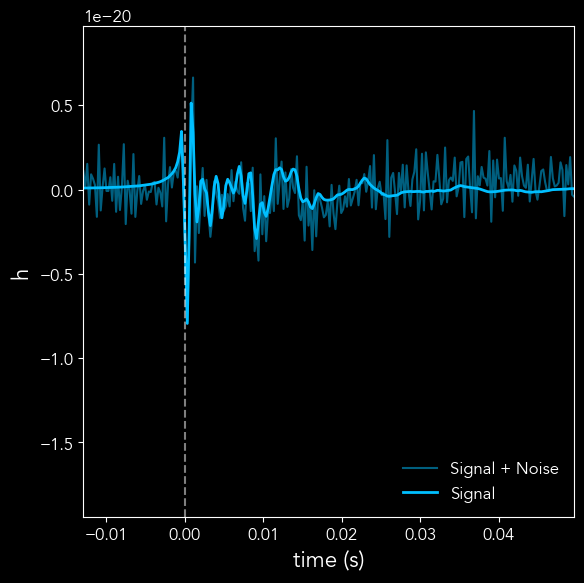

True params: tensor([0.0477, 4.0000, 6.4520, 0.2796])
[0.04772567 4.         6.452049   0.27955988]


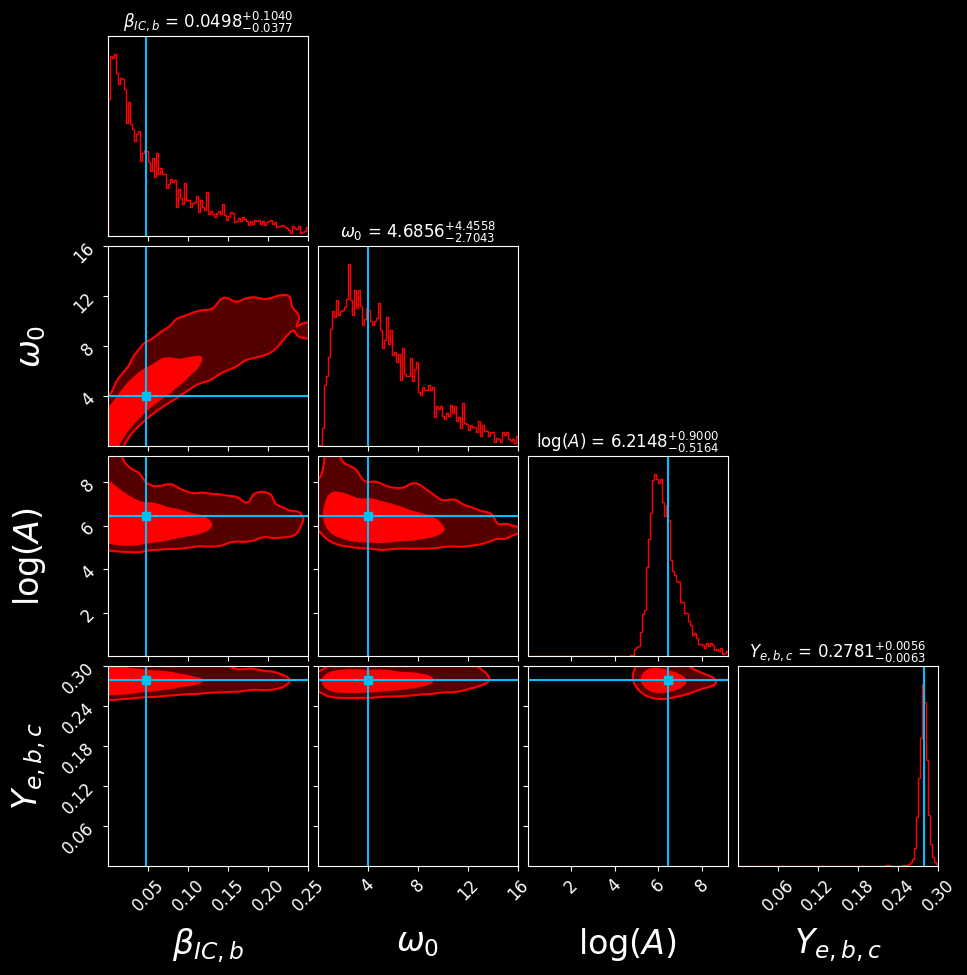

In [15]:
trainer.val_loader.dataset.update_snr(20)
signal, noisy_signal, params = trainer.val_loader.dataset.__getitem__(9)
plot_candidate_signal(noisy_signal=noisy_signal/TEN_KPC, signal=signal/TEN_KPC, max_value=trainer.validation_dataset.max_strain, fname="plots/detected_signal.svg", background="black")
trainer.plot_corner(signal=signal, noisy_signal=noisy_signal, params=params, fname="plots/corner_plot.svg")